<a name = "inicio"></a>

***

<div style="font-size: 30px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">Prueba evaluación continua (PEC2) </div>

<table>
  <tr>
    <td>
<div>
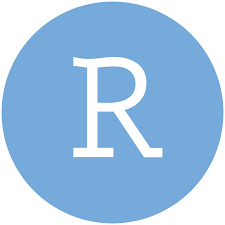
<td>&nbsp;</td><td>&nbsp;</td>
</div>
    </td>
    <td>
<div>
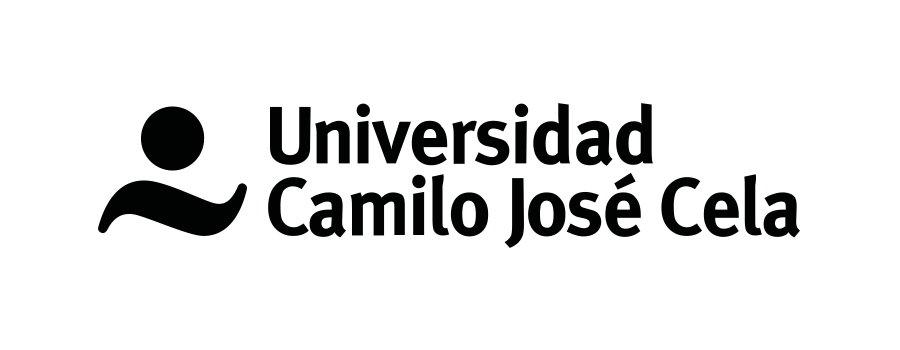
</div>       
</td>
  </tr>
<table>
    
<u>Índice de contenidos<u>:

1. [Instrucciones de la prueba](#topic1)
2. [Bloque 1: Ejercicios básicos de la prueba](#topic2)
3. [Bloque 2: Ejercicios intermedios de la prueba](#topic3) 
4. [Bloque 3: Ejercicios avanzados de la prueba](#topic4)

***

# Instrucciones de la prueba <a id="topic1"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


Este notebook corresponde a la <u>segunda prueba de evaluación continua</u>. El peso de la misma corresponde al **20% de la nota final** de la asignatura. Se establecen los siguientes tres niveles de evaluación por bloques de dificultad: 

1. Básico: el alumno es capaz de realizar tareas, ejercicios o prácticas similares a las realizadas durante la asignatura.
2. Intermedio: el alumno es capaz de aplicar las técnicas, conocimientos y habilidades vistas en clase a problemas con elementos diferentes.
3. Avanzado: el alumno es capaz de ampliar las técnicas, conocimientos y habilidades vistas en clase, investigando nuevos aspectos o problemas.

Las calificaciones, por tanto, serán coherentes al nivel alcanzado. Cada alumno deberá de entregar este mismo notebook con sus respuestas a través de la plataforma **Blackboard** llamando al archivo **PEC2_Apellidos**. El profesor publicará las calificaciones con posterioridad. ¡Mucha suerte y ánimo a tod@s!

**<mark>Nota.-**<mark><div style="background-color:#F7DC6F"><b>Tened en cuenta que deberéis de aportar respuestas detalladas y bien justificadas. No es admisible adjuntar únicamente el código sin comentar. Hay que incluir paso a paso lo que estáis haciendo en las propias celdas de código. Además, deberéis de razonar, argumentar e interpretar los resultados obtenidos utilizando para ello celdas tipo Markdown. </b></div>

# Bloque 1: Ejercicios básicos de la prueba <a id="topic2"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

### 01 Ejercicio [1.5 puntos] 

Un analista de deportes quiere saber si existe una relación entre la variable número de bateos que realiza un equipo de béisbol (`numero_bateos`) y la variable dependiente, número de runs que consigue, (`runs`). Para ello contáis con la base de datos $\tt beisbol$ que se aporta abajo sobre diferentes equipos de la Major League Baseball (MLB) de los EE.UU. Realizar los siguientes apartados:

1. Exploración inicial de la base de datos 
2. Análisis de la existencia de relación lineal entre las variables
3. Estimación de un modelo de regresión lineal simple entre las variables
4. Interpretación de las salidas de estimación de un modelo de regresión lineal simple

In [1]:
# Base de datos beisbol MLB
equipos = c("Texas", "Boston", "Detroit", "Kansas", "St.", "New_S.", "New_Y.", "Milwaukee", "Colorado", "Houston", "Baltimore", "Los_An.", "Chicago", "Cincinnati", "Los_P.", "Philadelphia", "Chicago", "Cleveland", "Arizona", "Toronto", "Minnesota", "Florida", "Pittsburgh", "Oakland", "Tampa", "Atlanta", "Washington", "San.F", "San.I", "Seattle")
numero_bateos = c(5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421)
runs = c(855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654 , 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556)
beisbol = data.frame(equipos, numero_bateos, runs)

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 01</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [2]:
str(beisbol)

'data.frame':	30 obs. of  3 variables:
 $ equipos      : chr  "Texas" "Boston" "Detroit" "Kansas" ...
 $ numero_bateos: num  5659 5710 5563 5672 5532 ...
 $ runs         : num  855 875 787 730 762 718 867 721 735 615 ...


Tenemos dos variables numéricas y una categórica. Y un total de 30 observaciones, es decir, 30 filas.

In [3]:
#seleccionamos las variables que nos interesan
beisbol2 <- beisbol[,c("numero_bateos", "runs")]
head(beisbol2, 4)

,numero_bateos,runs
,<dbl>,<dbl>
1,5659,855
2,5710,875
3,5563,787
4,5672,730


In [7]:
summary(beisbol2)

 numero_bateos       runs      
 Min.   :5417   Min.   :556.0  
 1st Qu.:5448   1st Qu.:629.0  
 Median :5516   Median :705.5  
 Mean   :5524   Mean   :693.6  
 3rd Qu.:5575   3rd Qu.:734.0  
 Max.   :5710   Max.   :875.0  

In [26]:
as.numeric(names(which(table(beisbol2$numero_bateos) == max(table(beisbol2$numero_bateos)))))
max(table(beisbol2$numero_bateos))

[1] 5421

[1] 3

In [25]:
as.numeric(names(which(table(beisbol2$runs) == max(table(beisbol2$runs)))))
max(table(beisbol2$runs))

[1] 654 735

[1] 2

Aqui obtenemos las medidas de posición, y no se ve ningún valor que llame la atención por el momento.
Por otro lado tenemos las medidas de tendencia central: la media y la mediana en este caso tienen un valor muy cercano, por lo que da la sensación de que hay un equilibrio en los datos por los extremos. en cuanto a la moda, vemos que no se repite mucho dicho valor, esto quiere decir que no es común que se dé el mismo número de bateos o número de runs en los distintos equipos.

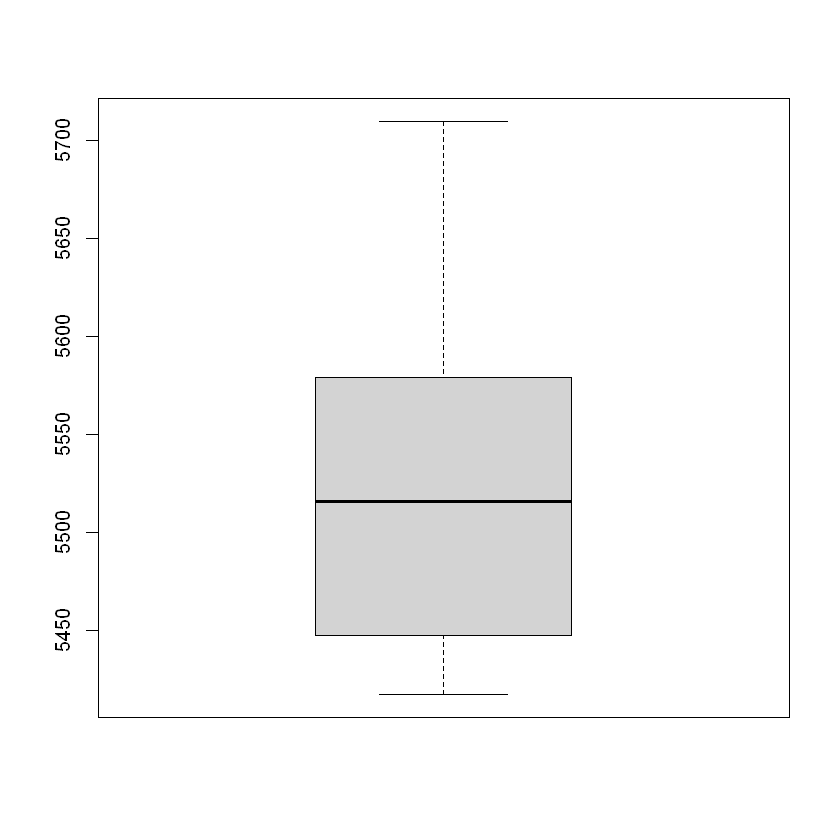

In [10]:
boxplot(beisbol2$numero_bateos)

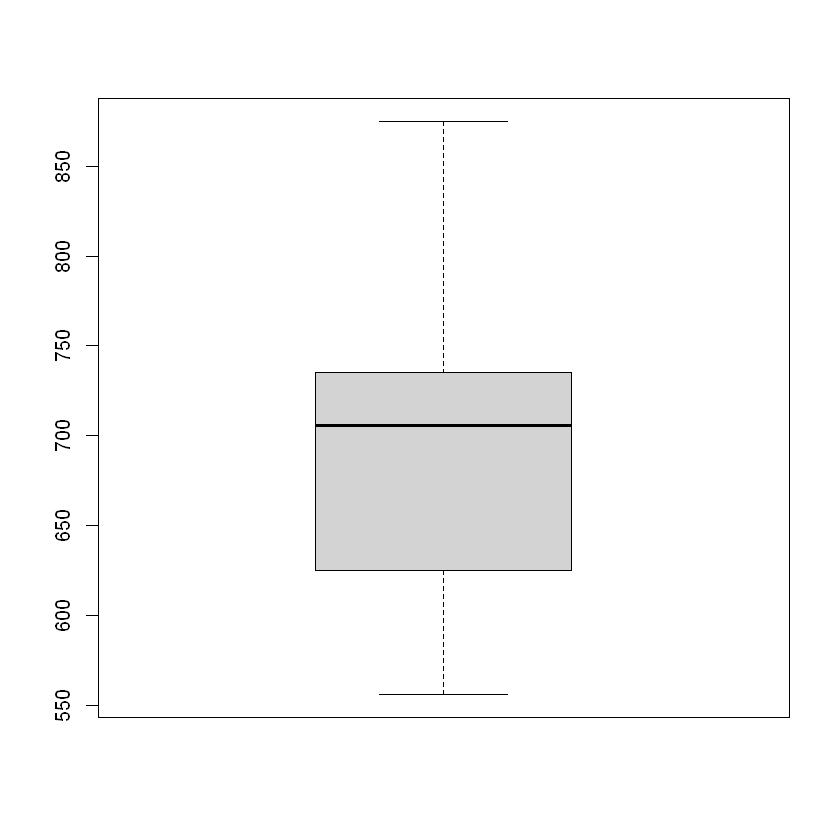

In [12]:
boxplot(beisbol2$runs)

A través de los gráficos de caja y bigotes vemos que no hay ningún punto anómalo, además no se aprecia ningún detalle fuera de lo normal.

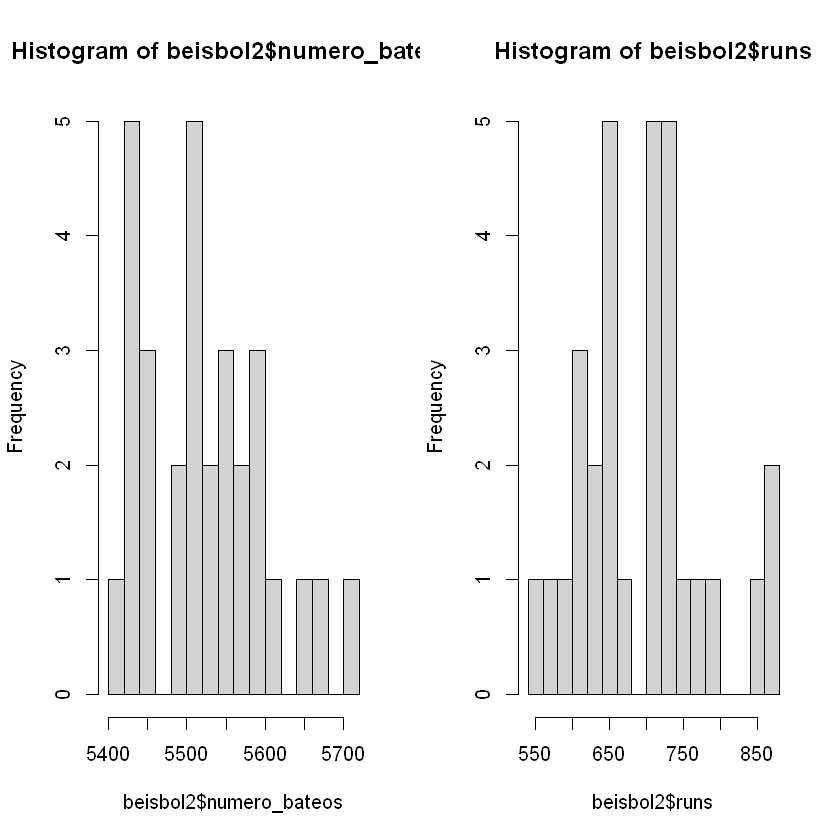

In [32]:
par(mfrow=c(1, 2))
hist(beisbol2$numero_bateos, breaks = 12)
hist(beisbol2$runs, breaks = 12)

Vemos que la variable número de bateos tiene bastantes observaciones con valores bajos, y a su vez tiene una cola hacia la derecha, es decir pocas observaciones con valores altos.
En el caso de los runs, vemos que tiene más forma de campana, aunque da la sencación de tener tambien cola hacia la derecha.

In [33]:
#medidas de dispersión
IQR(beisbol2$runs)
IQR(beisbol2$numero_bateos)

[1] 105

[1] 126.75

In [38]:
var(beisbol2$runs)
var(beisbol2$numero_bateos)

[1] 6802.8

[1] 6379.707

In [37]:
sd(beisbol2$runs)
sd(beisbol2$numero_bateos)

[1] 82.47909

[1] 79.87307

Vemos que los valores de dispersión son muy parecidos a pesar de que tienen una escala muy diferente. Existe una mayor dispersión en la variable runs ya que estos valores son más grandes para esta variable en comparación a las media.

In [39]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 4.1.3"


In [41]:
#medidas de forma
skewness(beisbol2$runs)
skewness(beisbol2$numero_bateos)
kurtosis(beisbol2$runs)
kurtosis(beisbol2$numero_bateos)

[1] 0.519944

[1] 0.4622908

[1] -0.3617933

[1] -0.6447216

En ambos casos tenemos una leve asimetría positiva, es decir que existe una cola hacia la derecha. Y además, en ambos casos tienen una leve forma platicúrtica.

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

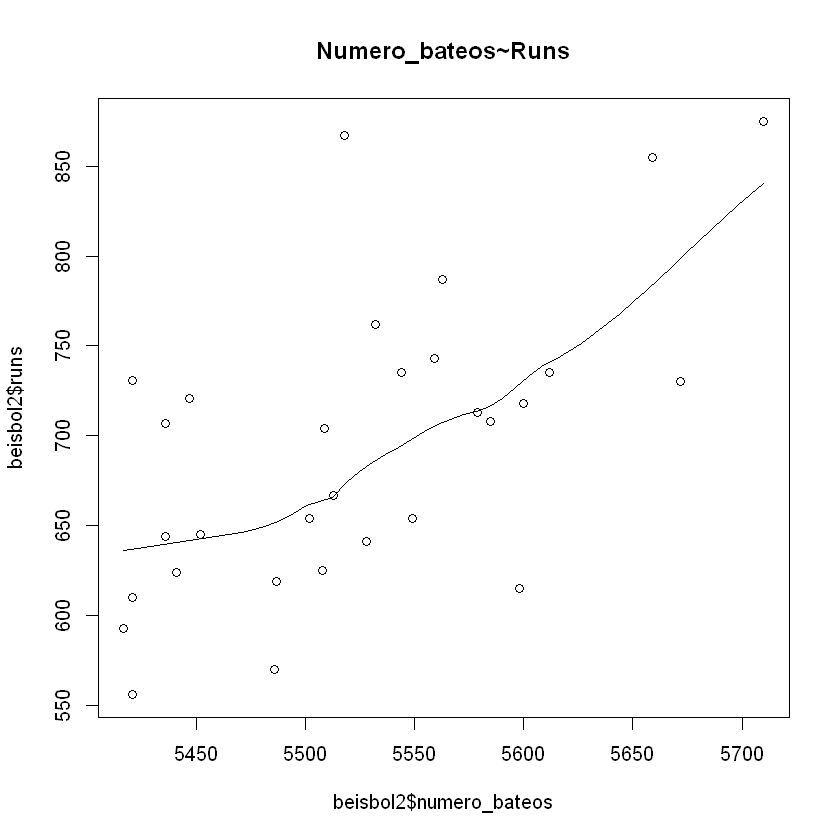

In [44]:
# Evidencia gráfica a través del gráfico de dispersión 
scatter.smooth(x = beisbol2$numero_bateos, y = beisbol2$runs, main = "Numero_bateos~Runs")

A través del gráfico de dispersión vemos que hay cierta relación positiva, pero no podemos confirmar nada hasta que se realice una prueba de hipótesis.

Para realizar el cálculo de correlación a través de un método paramétrico, hay que verificar si los datos cumplen el supuesto de normalidad y si existe homogeneidad entre las variables.
Para el supuesto de normalidad aplicamos el test de hipótesis de shapiro wilks ya que tenemos menos de 50 observaciones.
Para el supuesto de homogeneidad aplicamos el test de Barlett.

In [45]:
shapiro.test(beisbol2$numero_bateos)
shapiro.test(beisbol2$runs)


	Shapiro-Wilk normality test

data:  beisbol2$numero_bateos
W = 0.94797, p-value = 0.1491



	Shapiro-Wilk normality test

data:  beisbol2$runs
W = 0.94815, p-value = 0.1508


In [46]:
bartlett.test(list(beisbol2$numero_bateos, beisbol2$runs))


	Bartlett test of homogeneity of variances

data:  list(beisbol2$numero_bateos, beisbol2$runs)
Bartlett's K-squared = 0.029381, df = 1, p-value = 0.8639


En todos los casos hemos obtenido un P-valor mayor a 0.05, por lo que no podemos rechazar la hipótesis nula de normalidad, así como no podemos rechazar la hipótesis nula de igualdad de varianza.
Por tanto, podemos utilizar el método de Pearson para calcular la correlación, tanto como para realizar el test de hipótesis de correlación.

In [43]:
cor(beisbol$numero_bateos, beisbol$runs)

[1] 0.610627

Vemos que hay una correlación bastante alta, pero aun así para comprobar que este resultado es significativo debemos realizar el test de hipótesis.

In [47]:
cor.test(beisbol$numero_bateos, beisbol$runs)


	Pearson's product-moment correlation

data:  beisbol$numero_bateos and beisbol$runs
t = 4.0801, df = 28, p-value = 0.0003388
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3209675 0.7958231
sample estimates:
     cor 
0.610627 


Vemos que el P-valor es menor a 0.05, por tanto rechazamos la hipótesis nula de correlación entre variables = 0, confirmando así que existe correlación entre las variables.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [4]:
(modelo <- lm(runs ~ numero_bateos, data=beisbol2))


Call:
lm(formula = runs ~ numero_bateos, data = beisbol2)

Coefficients:
  (Intercept)  numero_bateos  
   -2789.2429         0.6305  


Aquí vemos el modelo que hemos creado, así como los coeficientes. 

El intercepto, que es el coeficiente que no acompaña a ninguna variable, tiene un valor de -2789, lo que quiere decir que cuando no hay número de bateos, el equipo tendria -2789 runs. Esto tiene su explicación, ya que según los datos, es necesario que haya un número grande de bateos para realizar algún run. 

Y por otro lado tenemos el coeficiente de la variable número de bateos, que representa la pendiente, es decir, cuánto aumenta los runs por cada unidad que aumenta el número de bateos, en este caso 0.63

In [49]:
str(modelo)

List of 12
 $ coefficients : Named num [1:2] -2789.243 0.631
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "numero_bateos"
 $ residuals    : Named num [1:30] 76 63.8 68.5 -57.2 63 ...
  ..- attr(*, "names")= chr [1:30] "1" "2" "3" "4" ...
 $ effects      : Named num [1:30] -3799 -271.2 55.1 -80.1 52.4 ...
  ..- attr(*, "names")= chr [1:30] "(Intercept)" "numero_bateos" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:30] 779 811 719 787 699 ...
  ..- attr(*, "names")= chr [1:30] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:30, 1:2] -5.477 0.183 0.183 0.183 0.183 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:30] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "numero_bateos"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.18 1.38
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 28
 $ xlevels     

Aqui vemos toda la información que podemos obtener del modelo

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [16]:
# 1. output de la regresión 
output <- summary(model)
output


Call:
lm(formula = obama ~ grad_univ + afro + hispanos + blancos, data = usa2)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.5451  -4.6028   0.1903   5.6963  14.3227 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.56196   12.91549   2.599   0.0125 *  
grad_univ    1.32020    0.19824   6.660 2.96e-08 ***
afro        -0.02711    0.14123  -0.192   0.8486    
hispanos    -0.18511    0.17091  -1.083   0.2844    
blancos     -0.27742    0.12177  -2.278   0.0274 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.852 on 46 degrees of freedom
Multiple R-squared:  0.5934,	Adjusted R-squared:  0.558 
F-statistic: 16.78 on 4 and 46 DF,  p-value: 1.502e-08


La función summary aplicada al modelo nos ofrece la información más utilizada del modelo. Nos muestra las medidas de posición de los valores de los residuos. También nos da información sobre los coeficientes como: la estimación (que ya lo hemos visto antes); el error estándar de los coeficientes; el t-valor, que es el cociente de la estimación entre el error estándar y se utiliza para los contrastes de significatividad de los coeficientes; y el p-valor del contraste de significatividad, donde H0 -> coeficiente = 0, e hipótesis alternativa, H1 -< coefficiente != 0. En este ejemplo, ambos P-valor son menor a 0.05, por lo que se rechaza la hipótesis nula, confirmando así que los coeficientes son estadísitcamente significativos.

Y por otro lado, nos muestra también: el valor residual estándar, que es igaual a 66, y los grados de libertad, que es igual al número de observaciones menos el número de parámetros estimados; El R^2 y su valor ajustado; el estadístico F; y el P-valor.

In [53]:
# 2. extracción de los coeficientes. Hay más métodos de extracción
coef(modelo)

(Intercept) numero_bateos 
  -2789.24289       0.63055

Ya lo hemos comentado antes.

In [54]:
# 3. extracción de los valores ajustados de la variable dependiente
head(modelo$fitted.values)

1        2        3        4        5        6 
779.0395 811.1976 718.5067 787.2367 698.9597 741.8371

Estos son los valores que el modelo cree que debe tener para la variable dependiente por cada valor de la variable independiente. Los valores ajustados se calculan ingresando los valores específicos de la variable independiente para cada observación del conjunto de datos en la ecuación del modelo. Este resultado menos el resultado real, u observado, es el residuo. Si unimos todos estos puntos debe aparecer la recta de regresión, cuanto más parecidos sean estos valores con sus respectivos valores observados quiere decir que hay una mayor precisión.

In [56]:
# 4. extracción de los residuos
head(modelo$residuals)

1         2         3         4         5         6 
 75.96048  63.80243  68.49328 -57.23667  63.04033 -23.83707

Como hemos mencionado anteriormente, los residuos son la diferencia entre el valor observado y el predicho, por lo que este valor representa lo que no puede ser explicado con las variables independientes que tenemos. Además estos nos brindan más información, ya que si los residuos son pequeños se distribuye aleaotiramente en torno a 0, quiere decir que la variable independiente es un buen explicativo de la variable dependiente, mientras que si los residuos son grandesy con mucha variabilidad, quiere decir que la variable no es capaz de captar todo lo necesario para explica la variable independiente o que hay más variables que lo expliquen. Además, el análisis de los residuos es esencial para verificar suposiciones críticas del modelo, como la homocedasticidad  y la normalidad de los residuos.

In [5]:
# 5. extracción de los grados de libertad
modelo$df.residual

[1] 28

Los grados de libertad se calculan como el número de observaciones menos el número de parámetros estimados. En este caso son 30 - 2 = 28. Se debe interpretar, de modo que cuanto más alto es este valor mayor es la confiabilidad de las conclusiones estadísticas extraídas del modelo, aunque no hay un criterio específico para determinar que es alto o bajo, se considera que menos de 100 es poco confiable.

In [8]:
# 6. extracción de la suma de los cuadrados de los residuos SSR
output$sigma

[1] 66.47284

El SSR refleja la variabilidad en una variable dependiente que no es explicada por el modelo. En nuestro caso es 66.47, eEsta cifra representa la suma de los cuadrados de las diferencia (residuos)s entre los valores observados y los valores predichoo.Cuantos menor sea el valor de SSR, mejor es el ajuste del modelo a los dato. En este caso tenemos un valor muy alto, ya que se considera bajo en el rango 0-0.1. 

In [9]:
# 7. Extracción de los errores de los coeficientes de regresión
output$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2789.24289,853.6957215,-3.267256,0.0028705508
numero_bateos,0.63055,0.1545414,4.080136,0.0003388351


La interpretación de los errores de los coeficientes es importante para entender la precisión de las estimaciones de los coeficientes. En este caso, donde la variable dependiente son los runs y la variable independiente es el número de bateos, el error estándar de 853 en el intercepto indica que hay una variabilidad muy grande en la estimación de los runs, independiente del número de bateos. Un valor  alto del error estándar sugiere una menor precisión en la estimación de este coeficiente. Por otro lado, el error estándar de 0.15 en el número de bateos, mucho más bajo, sugiere que hay más precisión en la estimación del efecto del número de bateos en los runs.

In [10]:
# 8. Extracción del valor de los coeficientes de determinación
output$r.squared

[1] 0.3728654

El R2 determina la variabilidad explicada por las variables independientes. En este caso tenemos un 0.37, lo que quiere decir que la variable número de bateos es capaz de explicar el 37% de la variabilidad de la variable runs. Este porcentaje es alto para ser tan solo una variable, pero aún queda más variables capaces de explicar el resto de variabilidad del modelo.

El R2 está relacionado con el número de variables independientes que consideramos. Cuanto más variables independientes agregamos a nuestro modelo, R2 irá mejorando por el simple hecho de incluir más variables. De este modo, R2 tiende a sobreestimar el proder predictivo del modelo, aunque las variables no sean significativas. Por ello es aconsejable utilizar también el R2 ajustado, que intenta corregir esto penalizando la incorporación de nuevas variables independientes.

In [11]:
output$adj.r.squared

[1] 0.3504677

Como solo tenemos una variable, este valor no se ve muy influenciado. 

In [12]:
# 9. Extracción de los intervalos de confianza para los coeficientes de regresión, en este caso 95%
confint(modelo)

,2.5 %,97.5 %
(Intercept),-4537.9592982,-1040.5264727
numero_bateos,0.3139863,0.9471137


El intervalo de confianza nos muestra un rango en los que se encuentra el coeficiente estimado con un cierto nivel de confianza. Cuanto más porcentaje de nivel de confianza menor será la precisión, pero también menor será el error. El rango al acercarse a 0, manteniendo el nivel de confianza constante, quiere decir que hay mayor precisión en la estimación. 

In [13]:
# 10. Extracción del estadístico F y su p-valor con la función 'anova'
anova(modelo)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
numero_bateos,1,73559.33,73559.332,16.64751,0.0003388351
Residuals,28,123721.87,4418.638,NA,NA


Estos valores encajan con los obtenidos en el summary del modelo. la función anova la utilizamos aquí para contrastar la significatividad global del conjunto de parámetros, siendo la hipótesis nula que los coeficientes calculados son igual a 0. En este caso, rechazamos la hipótesis nula ya que el p-valor es menor que el nivel de significación 0.05. Lo que implica que los valores de los coeficientes son distinto de 0, y por tanto significativos.

### 02 Ejercicio [1.5 puntos] 

El archivo de datos `USA.txt` contiene datos demográficos, sociales y económicos de los 50 estados de los Estados Unidos más el distrito de Columbia el año que Barack Obama ganó sus segundas elecciones presidenciales. Estos datos han sido recopilados de diversas fuentes como el United States Census Bureau, el Pew Research Center y el Bureau of Labor Statistics. Explicar variable `obama` que representa el porcentaje de votos a Obama en esas elecciones para cada estado en función de la variable `grad_univ` que representa el porcentaje de graduados universitarios de cada estado, la variable `afro` que representa el porcentaje de afroamericanos de cada estado, la variable `hispanos` que representa el porcentaje de hispanohablantes de cada estado y la variable `blancos` que representa el porcentaje de personas para cada estado cuya tonalidad de piel es clara. Realizar los siguientes apartados:

1. Cargar el dataset en R y transformarlo en un dataframe
2. Exploración inicial de la base de datos 
3. Análisis de la existencia de relación lineal entre las variables seleccionadas
4. Estimación de un modelo de regresión lineal múltiple entre las variables seleccionadas
5. Interpretación de las salidas de estimación del modelo de regresión lineal múltiple obtenido

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [1]:
usa <- read.table("USA.txt", header = T)
head(usa)

,estado,region,densidad,veteranos,mujeres,grad_instituto,grad_univ,afro,asia,hispanos,...,evangelicos,protestantes,relig_afro,catolicos,mormones,jubilados,paro,salario,obama,diputados
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,Alabama,3,94.4,8.1,51.5,82.6,22.3,26.2,1.1,3.9,...,49,1,18,6,1,13.8,8.0,43464,38.36,9
2,Alaska,4,1.2,10.1,48.0,91.6,27.5,3.3,5.4,5.5,...,26,19,2,14,4,7.7,7.6,63648,40.81,3
3,Arizona,4,56.3,8.2,50.3,85.4,26.6,4.1,2.8,29.6,...,23,15,2,25,4,13.8,8.4,47044,44.59,11
4,Arkansas,3,56.0,7.9,50.9,83.3,19.8,15.4,1.2,6.4,...,53,16,10,5,0,14.4,7.6,39018,36.88,6
5,California,4,239.1,5.0,50.3,81.0,30.5,6.2,13.0,37.6,...,18,14,4,31,2,11.4,10.4,57020,60.24,55
6,Colorado,4,48.5,8.1,49.9,89.9,36.7,4.0,2.8,20.7,...,23,19,2,19,2,10.9,7.8,57255,51.49,9


In [2]:
usa2 <- as.data.frame(usa[,c("obama", "grad_univ", "afro", "hispanos", "blancos")], row.names = usa$estado)
head(usa2)

,obama,grad_univ,afro,hispanos,blancos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,38.36,22.3,26.2,3.9,67.0
Alaska,40.81,27.5,3.3,5.5,64.1
Arizona,44.59,26.6,4.1,29.6,57.8
Arkansas,36.88,19.8,15.4,6.4,74.5
California,60.24,30.5,6.2,37.6,40.1
Colorado,51.49,36.7,4.0,20.7,70.0


<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [24]:
str(usa2)

'data.frame':	51 obs. of  5 variables:
 $ obama    : num  38.4 40.8 44.6 36.9 60.2 ...
 $ grad_univ: num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ afro     : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 50.7 16 ...
 $ hispanos : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ blancos  : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 34.8 57.9 ...


Tenemos 51 observaciones y 5 variables, 4 variables explicativas numéricas y 1 variable numérica a explicar.

In [25]:
summary(usa2)

     obama         grad_univ          afro          hispanos        blancos    
 Min.   :24.75   Min.   :17.90   Min.   : 0.40   Min.   : 1.00   Min.   :22.7  
 1st Qu.:40.23   1st Qu.:24.70   1st Qu.: 3.10   1st Qu.: 3.05   1st Qu.:59.8  
 Median :50.67   Median :27.10   Median : 7.40   Median : 8.20   Median :74.5  
 Mean   :49.03   Mean   :28.23   Mean   :11.12   Mean   :10.21   Mean   :70.7  
 3rd Qu.:56.22   3rd Qu.:30.95   3rd Qu.:15.65   3rd Qu.:12.05   3rd Qu.:82.6  
 Max.   :90.91   Max.   :51.20   Max.   :50.70   Max.   :46.30   Max.   :94.4  

In [29]:
max(table(usa2$obama))

[1] 24.75 27.82 32.62 33.23 35.54 36.88 37.80 37.99 38.03 38.36 38.69 39.08
[13] 39.87 40.58 40.81 41.38 41.70 43.79 43.93 44.09 44.38 44.59 45.48 48.35
[25] 50.01 50.67 51.16 51.49 51.97 51.98 51.99 52.36 52.65 52.83 52.99 54.21
[37] 54.24 56.16 56.27 57.60 58.06 58.38 58.61 60.24 60.65 61.97 62.70 63.35
[49] 66.57 70.55 90.91

[1] 1

In [35]:
as.numeric(names(which(table(usa2$afro) == max(table(usa2$afro)))))
max(table(usa2$afro))

[1] 1.1 1.2

[1] 2

In [36]:
as.numeric(names(which(table(usa2$blancos) == max(table(usa2$blancos)))))
max(table(usa2$blancos))

[1] 64.1 65.3

[1] 2

In [37]:
as.numeric(names(which(table(usa2$grad_univ) == max(table(usa2$grad_univ)))))
max(table(usa2$grad_univ))

[1] 24.7 28.5

[1] 2

In [38]:
as.numeric(names(which(table(usa2$hispanos) == max(table(usa2$hispanos)))))
max(table(usa2$hispanos))

[1] 8.9

[1] 3

Aqui obtenemos las medidas de posición. Parece que podemos econtrar algún punto anómalo en las variables obama, afro e hispanos, ya que el valor máximo se aleja bastante del tercer cuartil. Por otro lado tenemos las medidas de tendencia central: la media y la mediana en este caso tienen un valor muy cercano execpto en las variables afro e hispanos, por lo que da la sensación de que hay un equilibrio en los datos excepto en estas dos variables. en cuanto a la moda, vemos que no se repite mucho dicho valor, aunque es de extrañar que coincida justo un porcentaje de una determinada pobalción o nivel de estudios en diferentes estados, ya que son número con un decimal, pero ocurre en distintos porcentajes con dos repeticiones e incluso con 3 repeticiones.

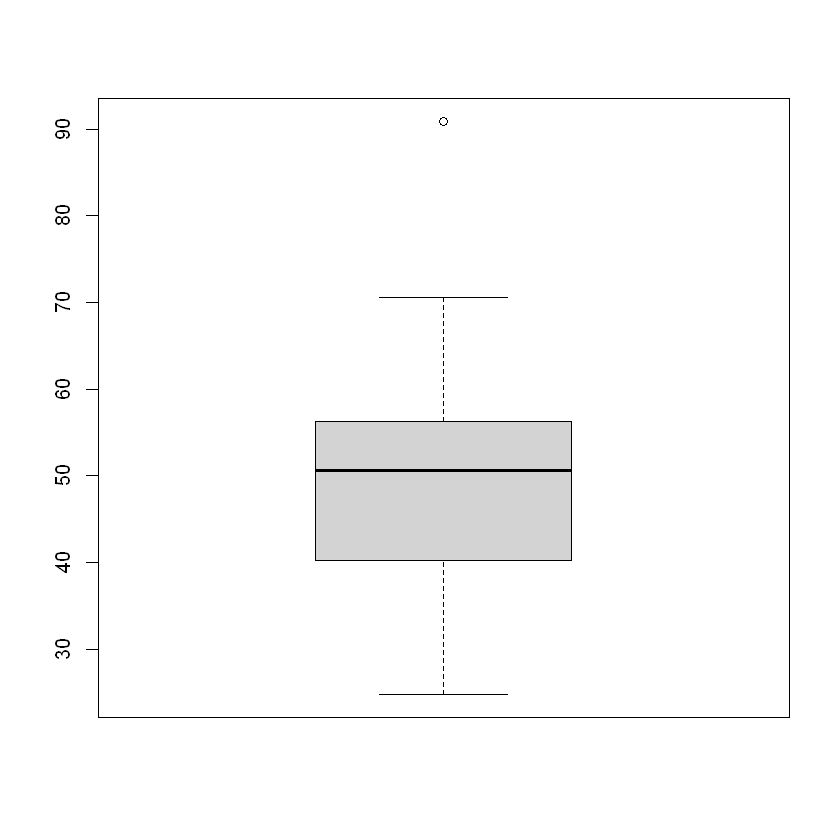

In [40]:
boxplot(usa2$obama)

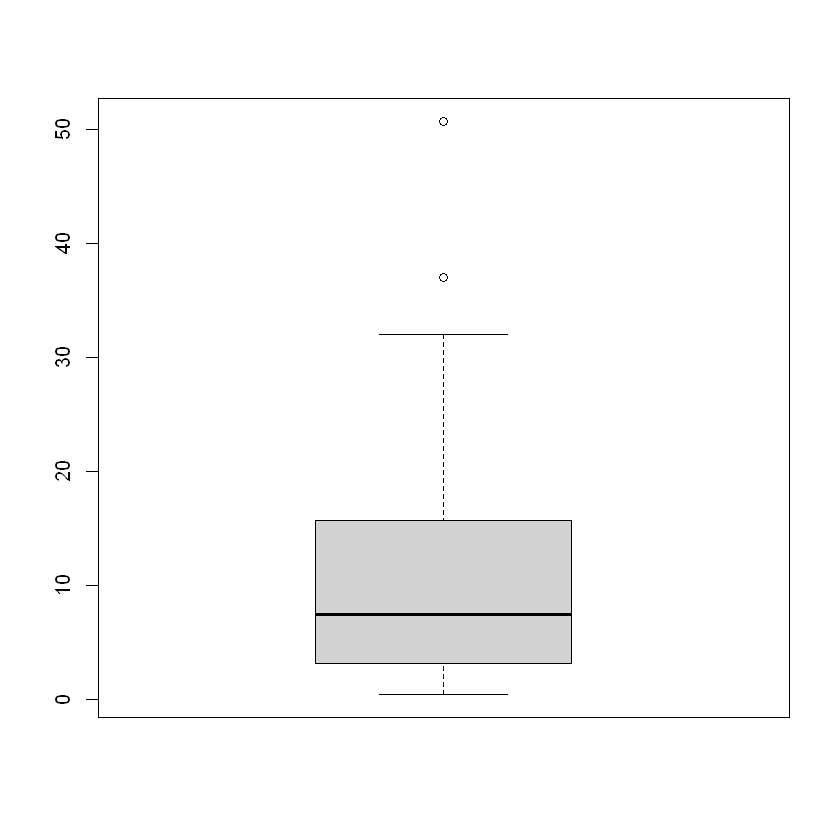

In [41]:
boxplot(usa2$afro)

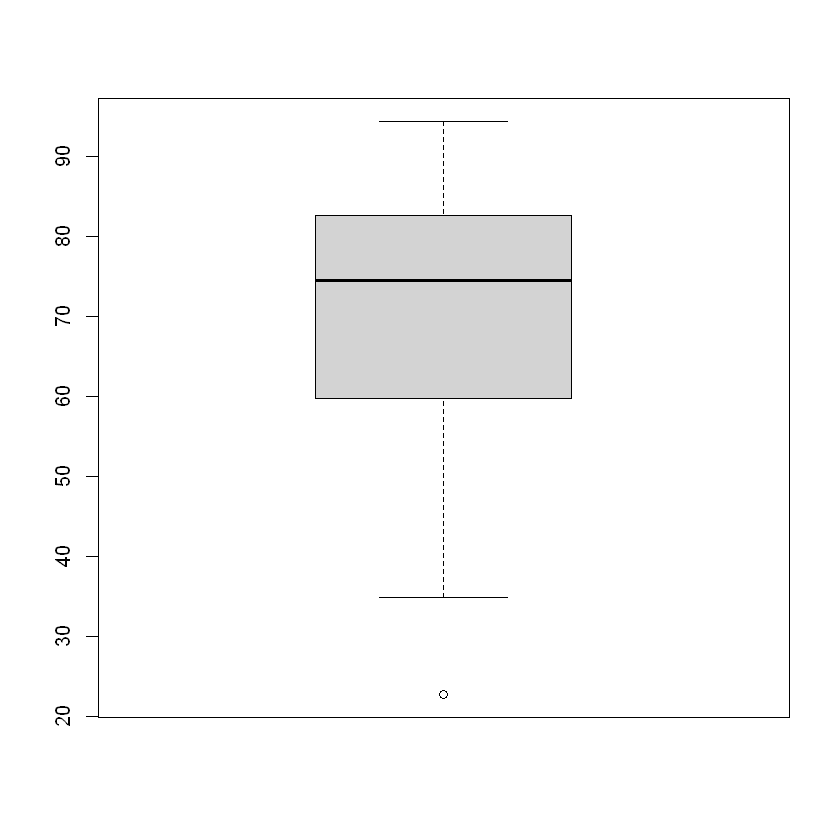

In [42]:
boxplot(usa2$blancos)

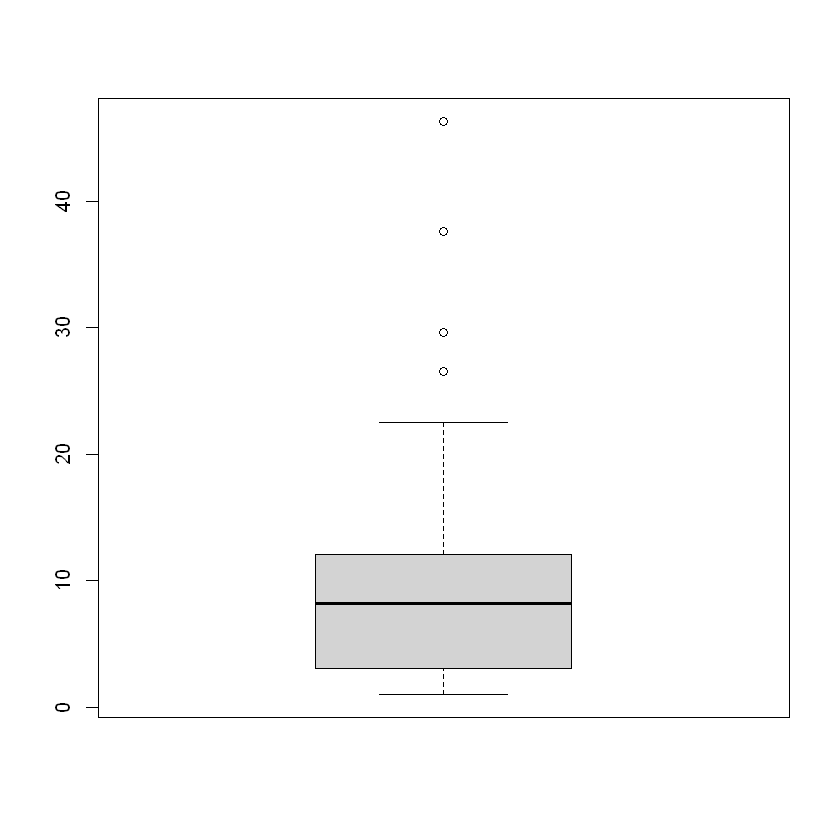

In [43]:
boxplot(usa2$hispanos)

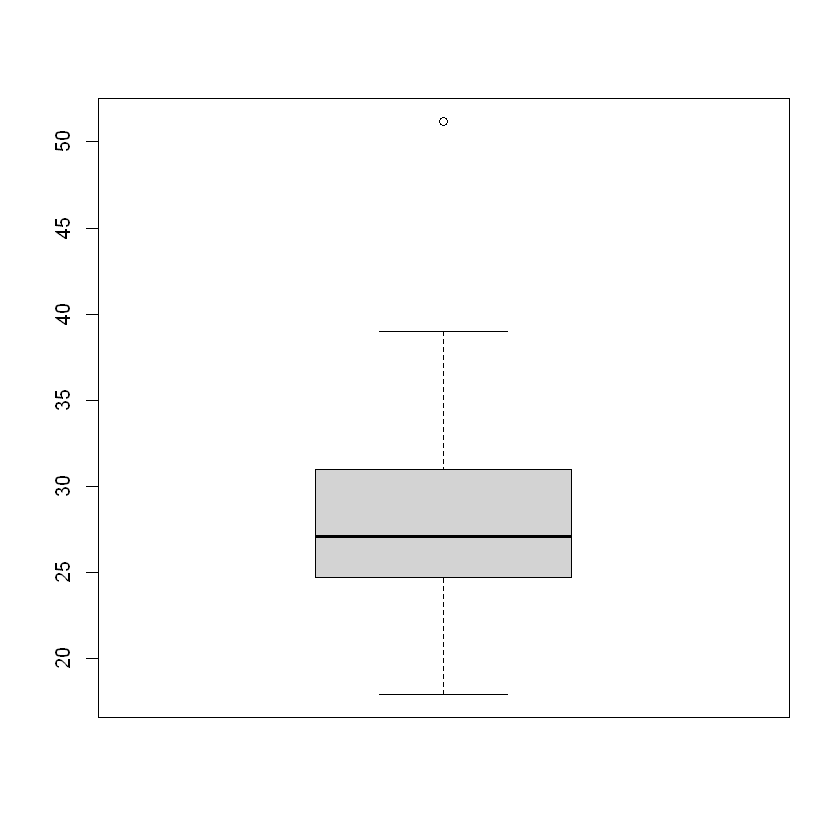

In [44]:
boxplot(usa2$grad_univ)

Como habíamos dicho anteriormente, podemos encontrar puntos anómalos en los valores superiores de las variables, obama, afro e hispanos, pero además hemos encontrado un punto anómalo en el variable grad_univ en los valores superiores y un punto anómalo en la variable blancos en los valores inferiores. Además vemos que la variable blancos se distribuye levemente de forma diferente.

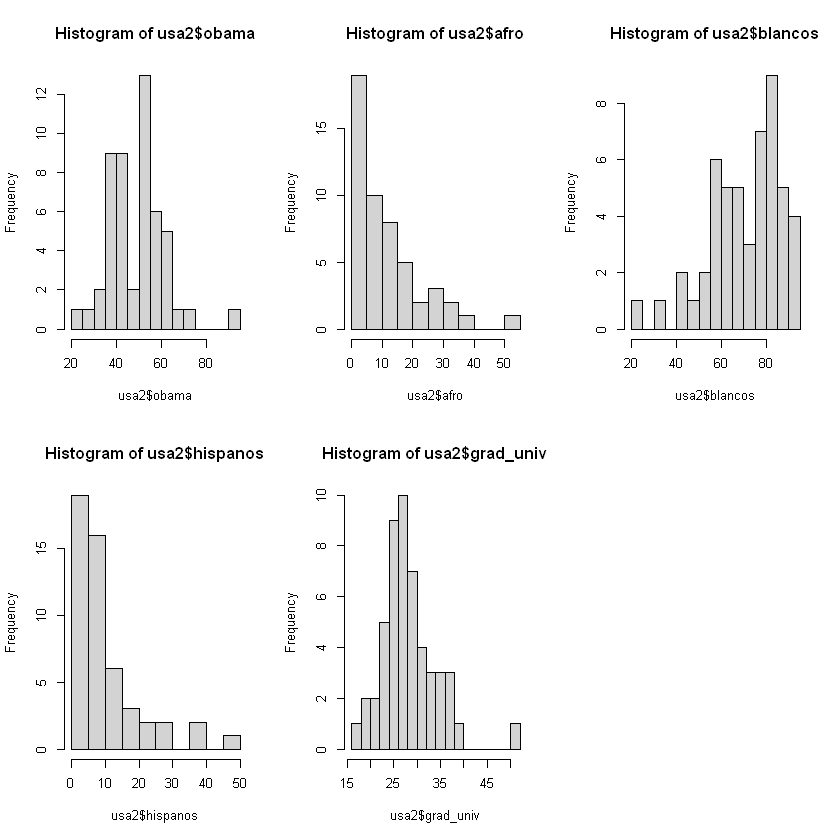

In [45]:
par(mfrow=c(2, 3))
hist(usa2$obama, breaks = 12)
hist(usa2$afro, breaks = 12)
hist(usa2$blancos, breaks = 12)
hist(usa2$hispanos, breaks = 12)
hist(usa2$grad_univ, breaks = 12)

Aqui vemos exactamente como se distribuye cada variable. Como se puede observar hay ciertos puntos que se alejan un poco de la campana, lo que nos costará poder predecir valores cercanos a estos, además podrían distorsionar la precisión de los modelos generados

In [46]:
IQR(usa2$obama)
IQR(usa2$afro)
IQR(usa2$blancos)
IQR(usa2$hispanos)
IQR(usa2$grad_univ)

[1] 15.99

[1] 12.55

[1] 22.8

[1] 9

[1] 6.25

In [48]:
var(usa2$obama)
var(usa2$afro)
var(usa2$blancos)
var(usa2$hispanos)
var(usa2$grad_univ)

[1] 139.4982

[1] 121.4677

[1] 261.3932

[1] 101.9032

[1] 33.50332

In [47]:
sd(usa2$obama)
sd(usa2$afro)
sd(usa2$blancos)
sd(usa2$hispanos)
sd(usa2$grad_univ)

[1] 11.81094

[1] 11.02124

[1] 16.16766

[1] 10.09471

[1] 5.788205

En los valores de dispersión vemos que la variable blancos tiene una mayor dispersión, mientras que la variable grad_univ es la que menos tiene.

In [49]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 4.1.3"


In [52]:
#medidas de forma
skewness(usa2$obama)
skewness(usa2$afro)
skewness(usa2$blancos)
skewness(usa2$grad_univ)
skewness(usa2$hispanos)

[1] 0.6744378

[1] 1.429056

[1] -0.7608548

[1] 1.232077

[1] 1.805002

In [54]:
kurtosis(usa2$obama)
kurtosis(usa2$afro)
kurtosis(usa2$blancos)
kurtosis(usa2$grad_univ)
kurtosis(usa2$hispanos)

[1] 1.440196

[1] 1.852434

[1] 0.1959671

[1] 3.009875

[1] 2.937749

En todas las variables tenemos asimetría positiva, es decir con cola a la derecha, excepto en la variable blancos. Aunque en la variable obama es más leve. Y respecto a la curtosis, todas las varibale tienen forma leptocúrtica, es decir con la curva estirada hacia arriba, a.unque en la variable blancos es muy leve.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

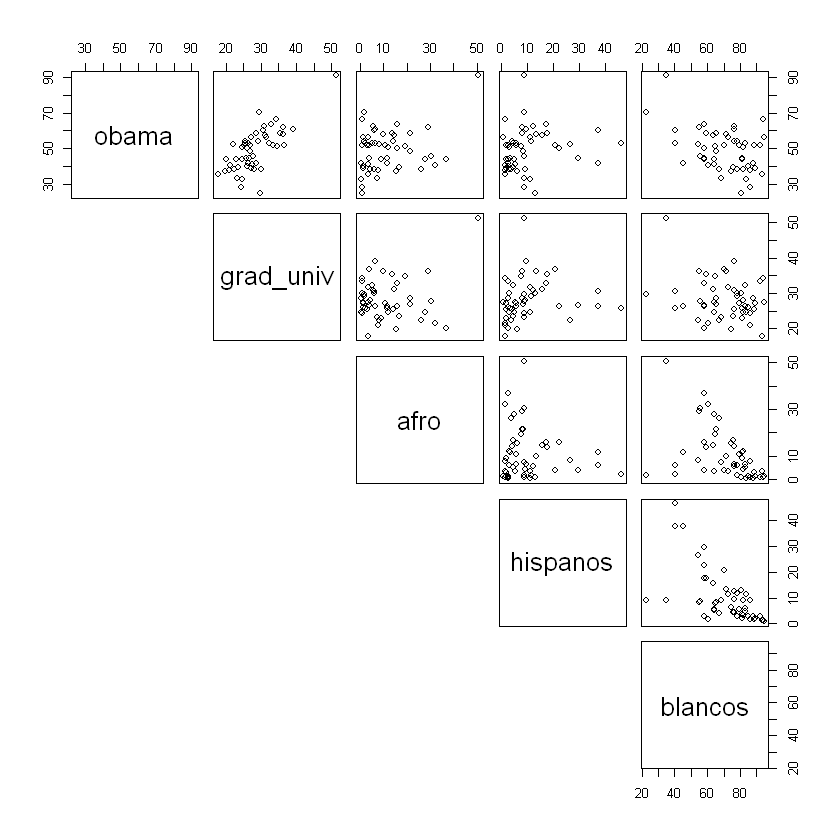

In [5]:
pairs(usa2, lower.panel = NULL)

Vemos a simple vista que las variables que están más correlacionadas con la variable dependiente son grad_univ, y blancos, Siendo la primera positiva y la segunda negativa.

In [7]:
cor(usa2)

,obama,grad_univ,afro,hispanos,blancos
obama,1.0000000,0.7154854,0.2834353,0.1601314,-0.4292205
grad_univ,0.7154854,1.0000000,0.1689640,0.1282210,-0.2450445
afro,0.2834353,0.1689640,1.0000000,-0.1083742,-0.4799778
hispanos,0.1601314,0.1282210,-0.1083742,1.0000000,-0.6126307
blancos,-0.4292205,-0.2450445,-0.4799778,-0.6126307,1.0000000


Justamente se ha cumplido lo que se mencionó anteriormente. Ahora hay que comprobar si el resultado es estadísticadísticamente significativo.

In [10]:
cor.test(usa2$obama, usa2$grad_univ)
cor.test(usa2$obama, usa2$afro)
cor.test(usa2$obama, usa2$hispanos)
cor.test(usa2$obama, usa2$blancos)


	Pearson's product-moment correlation

data:  usa2$obama and usa2$grad_univ
t = 7.1689, df = 49, p-value = 3.633e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.547943 0.827839
sample estimates:
      cor 
0.7154854 



	Pearson's product-moment correlation

data:  usa2$obama and usa2$afro
t = 2.0689, df = 49, p-value = 0.04385
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.008516833 0.518517459
sample estimates:
      cor 
0.2834353 



	Pearson's product-moment correlation

data:  usa2$obama and usa2$hispanos
t = 1.1356, df = 49, p-value = 0.2617
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1207824  0.4172998
sample estimates:
      cor 
0.1601314 



	Pearson's product-moment correlation

data:  usa2$obama and usa2$blancos
t = -3.3266, df = 49, p-value = 0.001673
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6302539 -0.1742479
sample estimates:
       cor 
-0.4292205 


En todos los casos, menos entre obama e hispanos, el p-valor es menor a 0.05, por lo que rechazamos la hipótesis nula que dice que la correlación entres las dos variables es 0, por tanto el resultado es significativo y existe relación entre las variables. 

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [14]:
model = lm(obama ~ grad_univ + afro + hispanos + blancos, data = usa2)
model


Call:
lm(formula = obama ~ grad_univ + afro + hispanos + blancos, data = usa2)

Coefficients:
(Intercept)    grad_univ         afro     hispanos      blancos  
   33.56196      1.32020     -0.02711     -0.18511     -0.27742  


In [15]:
str(model)

List of 12
 $ coefficients : Named num [1:5] 33.562 1.3202 -0.0271 -0.1851 -0.2774
  ..- attr(*, "names")= chr [1:5] "(Intercept)" "grad_univ" "afro" "hispanos" ...
 $ residuals    : Named num [1:51] -4.623 -10.167 -2.464 -0.552 4.665 ...
  ..- attr(*, "names")= chr [1:51] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ effects      : Named num [1:51] -350.11 59.75 13.77 -7.66 -17.89 ...
  ..- attr(*, "names")= chr [1:51] "(Intercept)" "grad_univ" "afro" "hispanos" ...
 $ rank         : int 5
 $ fitted.values: Named num [1:51] 43 51 47.1 37.4 55.6 ...
  ..- attr(*, "names")= chr [1:51] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ assign       : int [1:5] 0 1 2 3 4
 $ qr           :List of 5
  ..$ qr   : num [1:51, 1:5] -7.14 0.14 0.14 0.14 0.14 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:51] "Alabama" "Alaska" "Arizona" "Arkansas" ...
  .. .. ..$ : chr [1:5] "(Intercept)" "grad_univ" "afro" "hispanos" ...
  .. ..- attr(*, "assign")= int [1:5] 0 1 2 3 4
  ..$ qraux:

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

In [29]:
# 1. extracción de los outputs del modelo
output2 <- summary(model)
output2


Call:
lm(formula = obama ~ grad_univ + afro + hispanos + blancos, data = usa2)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.5451  -4.6028   0.1903   5.6963  14.3227 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.56196   12.91549   2.599   0.0125 *  
grad_univ    1.32020    0.19824   6.660 2.96e-08 ***
afro        -0.02711    0.14123  -0.192   0.8486    
hispanos    -0.18511    0.17091  -1.083   0.2844    
blancos     -0.27742    0.12177  -2.278   0.0274 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.852 on 46 degrees of freedom
Multiple R-squared:  0.5934,	Adjusted R-squared:  0.558 
F-statistic: 16.78 on 4 and 46 DF,  p-value: 1.502e-08


La función summary aplicada al modelo nos ofrece la información más utilizada del modelo. Nos muestra las medidas de posición de los valores de los residuos. También nos da información sobre los coeficientes como: la estimación (que ya lo hemos visto antes); el error estándar de los coeficientes; el t-valor, que es el cociente de la estimación entre el error estándar y se utiliza para los contrastes de significatividad de los coeficientes; y el p-valor del contraste de significatividad, donde H0 -> coeficiente = 0, e hipótesis alternativa, H1 -< coefficiente != 0. En este ejemplo, el intercepto, grad-univ y blancos, el P-valor son menor a 0.05, por lo que se rechaza la hipótesis nula, confirmando así que los coeficientes son estadísitcamente significativos. En el caso de la variable afro e hispanos, al valer el coeficiente 0 podríamos eliminar estas variables del modelo.

Y por otro lado, nos muestra también: el valor residual estándar, que es igual a 7.85, y los grados de libertad, que es igual al número de observaciones menos el número de parámetros estimados; El R^2 y su valor ajustado; el estadístico F; y el P-valor.

In [21]:
# 2. extracción de los coeficientes. Hay más métodos de extracción
coef(model)

(Intercept)   grad_univ        afro    hispanos     blancos 
33.56195832  1.32019708 -0.02711411 -0.18511387 -0.27741857

Ya se ha comentado antes

In [23]:
# 3.extracción de los valores ajustados de la variable dependiente
head(model$fitted.values)

Alabama     Alaska    Arizona   Arkansas California   Colorado 
  42.98297   50.97724   47.05387   37.43189   55.57510   58.65358

Estos son los valores que el modelo cree que debe tener para la variable dependiente por cada valor de la variable independiente. Los valores ajustados se calculan ingresando los valores específicos de la variable independiente para cada observación del conjunto de datos en la ecuación del modelo. Este resultado menos el resultado real, u observado, es el residuo. Si unimos todos estos puntos debe aparecer la recta de regresión, cuanto más parecidos sean estos valores con sus respectivos valores observados quiere decir que hay una mayor precisión.

In [24]:
# 4.extracción de los residuos
head(model$residuals)

Alabama      Alaska     Arizona    Arkansas  California    Colorado 
 -4.6229749 -10.1672445  -2.4638686  -0.5518906   4.6649047  -7.1635773

Como hemos mencionado anteriormente, los residuos son la diferencia entre el valor observado y el predicho, por lo que este valor representa lo que no puede ser explicado con las variables independientes que tenemos. Además estos nos brindan más información, ya que si los residuos son pequeños se distribuye aleaotiramente en torno a 0, quiere decir que la variable independiente es un buen explicativo de la variable dependiente, mientras que si los residuos son grandes y con mucha variabilidad, quiere decir que la variable no es capaz de captar todo lo necesario para explica la variable independiente o que hay más variables que lo expliquen. Además, el análisis de los residuos es esencial para verificar suposiciones críticas del modelo, como la homocedasticidad y la normalidad de los residuos.

In [27]:
# 5.extracción de los grados de libertad
model$df.residual

[1] 46

Los grados de libertad se calculan como el número de observaciones menos el número de parámetros estimados. En este caso son 51 - 5 = 46. Se debe interpretar, de modo que cuanto más alto es este valor mayor es la confiabilidad de las conclusiones estadísticas extraídas del modelo, aunque no hay un criterio específico para determinar que es alto o bajo, se considera que menos de 100 es poco confiable.

In [30]:
# 6.extracción de la suma de los cuadrados de los residuos SSR
output2$sigma

[1] 7.851859

El SSR refleja la variabilidad en una variable dependiente que no es explicada por el modelo. En nuestro caso es 7.85, esta cifra representa la suma de los cuadrados de las diferencia (residuos) entre los valores observados y los valores predichos.Cuantos menor sea el valor de SSR, mejor es el ajuste del modelo a los datos. En este caso tenemos un valor relativamente alto, ya que se considera bajo en el rango 0-0.1.

In [31]:
# 7.Extracción de los errores de los coeficientes de regresión
output2$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),33.56195832,12.9154892,2.5985821,1.253633e-02
grad_univ,1.32019708,0.1982426,6.6595009,2.957847e-08
afro,-0.02711411,0.1412342,-0.1919798,8.486030e-01
hispanos,-0.18511387,0.1709108,-1.0831024,2.844078e-01
blancos,-0.27741857,0.1217729,-2.2781629,2.740886e-02


La interpretación de los errores de los coeficientes es importante para entender la precisión de las estimaciones de los coeficientes. En este caso, el error estándar de 12.91 en el intercepto indica que hay cierta variabilidad en la estimación deel porcentaje de votos de a Obama, independientemente del resto de variables. Un valor alto del error estándar sugiere una menor precisión en la estimación de este coeficiente. Por otro lado, el error estándar del resto de variables es mucho más bajo (entre 0.12 y 0.19), sugiere que hay más precisión en la estimación del efecto de estas variables en las votaciones.

In [32]:
# 8.Extracción del valor de los coeficientes de determinación
output2$r.squared

[1] 0.5934029

El R2 determina la variabilidad explicada por las variables independientes. En este caso tenemos un 0.59, lo que quiere decir que las variables seleccionadas son capaces de explicar el 59% de la variabilidad de la variable dependiente. Este porcentaje es relativamente alto, pero aún queda más variables capaces de explicar el resto de variabilidad del modelo.

In [33]:
output2$adj.r.squared

[1] 0.5580467

Vemos que existe cierta penalización ya al introducir más variables

In [34]:
# 9.Extracción de los intervalos de confianza para los coeficientes de regresión, en este caso 95%
confint(model)

,2.5 %,97.5 %
(Intercept),7.5644270,59.55948960
grad_univ,0.9211553,1.71923883
afro,-0.3114038,0.25717559
hispanos,-0.5291394,0.15891168
blancos,-0.5225348,-0.03230237


El intervalo de confianza nos muestra un rango en los que se encuentra el coeficiente estimado con un cierto nivel de confianza. Cuanto más porcentaje de nivel de confianza menor será la precisión, pero también menor será el error. El rango al acercarse a 0, manteniendo el nivel de confianza constante, quiere decir que hay mayor precisión en la estimación. En este caso vemos que las variables independientes tienen bastante precisión.

In [35]:
# 10.Extracción del estadístico F y su p-valor con la función 'anova'
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
grad_univ,1,3570.59170,3570.59170,57.9155463,1.116861e-09
afro,1,189.69656,189.69656,3.0769074,8.607173e-02
hispanos,1,58.67022,58.67022,0.9516399,3.344046e-01
blancos,1,319.97391,319.97391,5.1900261,2.740886e-02
Residuals,46,2835.97806,61.65170,NA,NA


Estos valores encajan con los obtenidos en el summary del modelo. la función anova la utilizamos aquí para contrastar la significatividad global del conjunto de parámetros, siendo la hipótesis nula que los coeficientes calculados son igual a 0. En este caso, rechazamos la hipótesis nula ya que el p-valor es menor que el nivel de significación 0.05. Lo que implica que los valores de los coeficientes son distinto de 0, y por tanto significativos.

### 03 Ejercicio [2 puntos] 

Utilizando el dataset del ejercicio anterior encontrar de forma automática el mejor modelo de regresión lineal múltiple para explicar la variable `obama` en función del resto de variables excepto `estado`. Comparar sus métricas y realizar la diagnosis del modelo de regresión elegido. Es decir, tenéis que hacer los siguientes pasos: 

1. Criterios de selección del modelo en base al ajuste de los datos
2. Proceso de automatización del proceso de selección del mejor modelo
3. Requisitos y validación del mejor modelo seleccionado en base al ajuste de los datos

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 03</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [45]:
usa <- as.data.frame(usa[,-1], row.names = usa$estado)
head(usa)

,region,densidad,veteranos,mujeres,grad_instituto,grad_univ,afro,asia,hispanos,blancos,evangelicos,protestantes,relig_afro,catolicos,mormones,jubilados,paro,salario,obama,diputados
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
Alabama,3,94.4,8.1,51.5,82.6,22.3,26.2,1.1,3.9,67.0,49,1,18,6,1,13.8,8.0,43464,38.36,9
Alaska,4,1.2,10.1,48.0,91.6,27.5,3.3,5.4,5.5,64.1,26,19,2,14,4,7.7,7.6,63648,40.81,3
Arizona,4,56.3,8.2,50.3,85.4,26.6,4.1,2.8,29.6,57.8,23,15,2,25,4,13.8,8.4,47044,44.59,11
Arkansas,3,56.0,7.9,50.9,83.3,19.8,15.4,1.2,6.4,74.5,53,16,10,5,0,14.4,7.6,39018,36.88,6
California,4,239.1,5.0,50.3,81.0,30.5,6.2,13.0,37.6,40.1,18,14,4,31,2,11.4,10.4,57020,60.24,55
Colorado,4,48.5,8.1,49.9,89.9,36.7,4.0,2.8,20.7,70.0,23,19,2,19,2,10.9,7.8,57255,51.49,9


In [50]:
#preselección de variables
str(usa)

'data.frame':	51 obs. of  20 variables:
 $ region        : int  3 4 4 3 4 4 1 3 3 3 ...
 $ densidad      : num  94.4 1.2 56.3 56 239.1 ...
 $ veteranos     : num  8.1 10.1 8.2 7.9 5 8.1 6 8.5 5.2 8.3 ...
 $ mujeres       : num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 52.8 51.1 ...
 $ grad_instituto: num  82.6 91.6 85.4 83.3 81 89.9 89 87.7 87.5 85.8 ...
 $ grad_univ     : num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ afro          : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 50.7 16 ...
 $ asia          : num  1.1 5.4 2.8 1.2 13 2.8 3.8 3.2 3.5 2.4 ...
 $ hispanos      : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ blancos       : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 34.8 57.9 ...
 $ evangelicos   : int  49 26 23 53 18 23 9 15 15 25 ...
 $ protestantes  : int  1 19 15 16 14 19 13 18 20 15 ...
 $ relig_afro    : int  18 2 2 10 4 2 4 14 18 8 ...
 $ catolicos     : int  6 14 25 5 31 19 43 27 18 26 ...
 $ mormones      : int  1 4 4 0 2 2 1 0 0 0 ...
 $ jubilados  

Vamos a tomar 9 combinaciones de entre todas las variables para no tener que hacer una combinación de todas las variables para crear cada modelo de regresión lineal múltiple posible, ya que nos saldría un número de combinaciones exactamente de 171, sin incluir interacciones. 

In [51]:
mod1 = lm(obama ~ grad_univ + densidad, data = usa)
mod2 = lm(obama ~ grad_univ + densidad + paro, data = usa)
mod3 = lm(obama ~ grad_univ * densidad * paro, data = usa)
mod4 = lm(obama ~ asia + mujeres, data = usa)
mod5 = lm(obama ~ asia * mujeres, data = usa)
mod6 = lm(obama ~ blancos + catolicos, data = usa)
mod7 = lm(obama ~ blancos * catolicos, data = usa)
mod8 = lm(obama ~  blancos + catolicos + jubilados, data = usa)
mod9 = lm(obama ~ ., data = usa)

Una vez que tenemos los modelos vamos a calcular 3 criterios de selección de modelos

In [52]:
# Coeficiente de determinación ajustado
R2=c(summary(mod1)$adj.r.squared, summary(mod2)$adj.r.squared,summary(mod3)$adj.r.squared,
     summary(mod4)$adj.r.squared,summary(mod5)$adj.r.squared,summary(mod6)$adj.r.squared,
     summary(mod7)$adj.r.squared,summary(mod8)$adj.r.squared,summary(mod9)$adj.r.squared)

In [53]:
# Criterio de Información de Akaike
AIC=c(extractAIC(mod1)[2],extractAIC(mod2)[2],extractAIC(mod3)[2],extractAIC(mod4)[2],
      extractAIC(mod5)[2],extractAIC(mod6)[2],extractAIC(mod7)[2],extractAIC(mod8)[2],
      extractAIC(mod9)[2])

In [54]:
# Criterio de Información Bayesiano
BIC=c(extractAIC(mod1,k=log(nrow(usa)))[2],extractAIC(mod2,k=log(nrow(usa)))[2],
      extractAIC(mod3,k=log(nrow(usa)))[2],extractAIC(mod4,k=log(nrow(usa)))[2],
      extractAIC(mod5,k=log(nrow(usa)))[2],extractAIC(mod6,k=log(nrow(usa)))[2],
      extractAIC(mod7,k=log(nrow(usa)))[2],extractAIC(mod8,k=log(nrow(usa)))[2],
      extractAIC(mod9,k=log(nrow(usa)))[2])

In [55]:
install.packages("knitr")
require(knitr)

Installing package into 'C:/Users/PC/Documents/R/win-library/4.1'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
      binary source needs_compilation
knitr   1.42   1.45             FALSE



installing the source package 'knitr'


Warning message in install.packages("knitr"):
"installation of package 'knitr' had non-zero exit status"
Loading required package: knitr

Warning message:
"package 'knitr' was built under R version 4.1.3"


In [56]:
Medidas = data.frame(R2,AIC,BIC,row.names=c("modelo1","modelo2","modelo3","modelo4","modelo5","modelo6","modelo7","modelo8","modelo9"))
names(Medidas) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas)



|        | Coef.R2adj|      AIC|      BIC|
|:-------|----------:|--------:|--------:|
|modelo1 |  0.5203253| 217.2818| 223.0773|
|modelo2 |  0.6094141| 207.7296| 215.4569|
|modelo3 |  0.6376459| 207.3669| 222.8215|
|modelo4 |  0.4634478| 222.9966| 228.7921|
|modelo5 |  0.4746254| 222.8492| 230.5765|
|modelo6 |  0.3750065| 230.7781| 236.5735|
|modelo7 |  0.4347930| 226.5763| 234.3036|
|modelo8 |  0.3962639| 229.9395| 237.6668|
|modelo9 |  0.8300783| 176.0576| 214.6941|

Vemos que el mejor modelo es el que se compone de todas las variables, aunque el modelo 2 está muy cerca. Escogeríamos el modelo 9, y como es muy probable que no todas las variables sean significativas, debemos refinar el modelo.

In [57]:
summary(mod9)


Call:
lm(formula = obama ~ ., data = usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0109 -2.2652  0.4366  1.7794 12.4711 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.464e+02  1.747e+02  -0.838 0.408275    
region         -2.145e+00  1.714e+00  -1.251 0.220294    
densidad        2.133e-03  1.155e-03   1.846 0.074472 .  
veteranos       3.909e-01  1.259e+00   0.311 0.758220    
mujeres         1.487e+00  3.250e+00   0.457 0.650507    
grad_instituto  6.418e-01  5.968e-01   1.076 0.290449    
grad_univ       8.180e-01  3.982e-01   2.054 0.048457 *  
afro           -3.334e-02  4.630e-01  -0.072 0.943056    
asia            1.362e+00  4.382e-01   3.107 0.004025 ** 
hispanos        5.531e-01  3.185e-01   1.737 0.092399 .  
blancos         3.252e-01  2.590e-01   1.256 0.218547    
evangelicos    -1.851e-01  1.186e-01  -1.561 0.128653    
protestantes    1.957e-01  1.868e-01   1.048 0.302967    
relig_afro      7.583e-01  6.971e-01

In [58]:
mod10 = lm(obama ~ densidad + grad_univ + asia + hispanos + mormones + paro, data = usa)

In [60]:
R2=c(summary(mod9)$r.squared, summary(mod10)$r.squared)
AIC=c(extractAIC(mod9)[2],extractAIC(mod10)[2])
BIC=c(extractAIC(mod9,k=log(nrow(usa)))[2],extractAIC(mod10,k=log(nrow(usa)))[2])

In [61]:
Medidas=data.frame(R2,AIC,BIC,row.names=c("modelo9","modelo10"))
names(Medidas)=c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas)



|         | Coef.R2adj|      AIC|      BIC|
|:--------|----------:|--------:|--------:|
|modelo9  |  0.8946486| 176.0576| 214.6941|
|modelo10 |  0.8014246| 182.3848| 195.9076|

Vemos que el modelo 10 tiene un menor AIC y BIC, y un R2 muy parecido, pero reduciendo 13 variables. De este modo reducimos el sesgo de tener muchas variables en el modelo.

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

Tenemos dos posibilidadese de automatizar el proceso de selección de modelos según en la dirección que lo hagamos.

Backward: Se parte de un modelo con todas las variables, y en cada paso se elimina cada variable del modelo, el modelo que tenga menor AIC pasa al siguiente paso. Se vuelve a repetir el proceso hasta que no se consiga un menor AIC.

Forward: se trata de hacerlo de la manera contraria, se parte de ninguna variable, se añade cada variable a un modelo, se determina el mejor modelo con el menor AIC, y se continua partiendo de ese modelo añadiendo otra variabel más, y así sucesivamente hasta que no se mejor el AIC.

In [67]:
#Backward
step(mod9, direction = "backward")

Start:  AIC=176.06
obama ~ region + densidad + veteranos + mujeres + grad_instituto + 
    grad_univ + afro + asia + hispanos + blancos + evangelicos + 
    protestantes + relig_afro + catolicos + mormones + jubilados + 
    paro + salario + diputados

                 Df Sum of Sq     RSS    AIC
- afro            1      0.12  734.94 174.07
- jubilados       1      1.43  736.24 174.16
- veteranos       1      2.29  737.10 174.22
- catolicos       1      2.81  737.63 174.25
- mujeres         1      4.96  739.78 174.40
- salario         1     24.98  759.80 175.76
- protestantes    1     26.01  760.83 175.83
- grad_instituto  1     27.42  762.24 175.93
- relig_afro      1     28.05  762.87 175.97
- diputados       1     29.04  763.86 176.03
<none>                         734.82 176.06
- region          1     37.10  771.91 176.57
- blancos         1     37.39  772.20 176.59
- evangelicos     1     57.77  792.58 177.92
- hispanos        1     71.48  806.30 178.79
- densidad        1     80.


Call:
lm(formula = obama ~ densidad + mujeres + grad_instituto + grad_univ + 
    asia + hispanos + evangelicos + mormones + paro, data = usa)

Coefficients:
   (Intercept)        densidad         mujeres  grad_instituto       grad_univ  
    -3.263e+02       1.555e-03       5.087e+00       1.056e+00       4.207e-01  
          asia        hispanos     evangelicos        mormones            paro  
     7.629e-01       1.379e-01      -1.596e-01      -3.967e-01       1.854e+00  


El modelo completo tenia un AIC de 176, y obtenemos que el mejor menor AIC (174.07) ahora lo tiene el modelo completo eliminando la variable afro. Se vuelve a repetir el proceso hasta el último paso, donde conseguimos un AIC de 165.22, y  nos quedamos con 9 variables, es decir, eliminamos 10 variables del modelo

In [68]:
#Forward
mod <- lm(obama ~ 1, data=usa)
step(mod, direction = "forward", scope = list(upper=mod9, lower=mod))

Start:  AIC=252.83
obama ~ 1

                 Df Sum of Sq    RSS    AIC
+ grad_univ       1    3570.6 3404.3 218.25
+ densidad        1    2378.5 4596.4 233.56
+ mujeres         1    1702.0 5272.9 240.56
+ catolicos       1    1549.6 5425.3 242.02
+ salario         1    1351.1 5623.8 243.85
+ blancos         1    1285.0 5689.9 244.45
+ asia            1    1174.4 5800.5 245.43
+ evangelicos     1    1129.4 5845.5 245.82
+ mormones        1     843.4 6131.5 248.26
+ paro            1     795.7 6179.2 248.65
+ veteranos       1     739.8 6235.1 249.11
+ region          1     578.7 6396.2 250.41
+ afro            1     560.3 6414.6 250.56
<none>                        6974.9 252.83
+ hispanos        1     178.9 6796.1 253.51
+ diputados       1     153.4 6821.5 253.70
+ jubilados       1     100.2 6874.7 254.09
+ relig_afro      1      98.4 6876.5 254.11
+ grad_instituto  1      66.3 6908.6 254.34
+ protestantes    1       2.6 6972.3 254.81

Step:  AIC=218.25
obama ~ grad_univ

        


Call:
lm(formula = obama ~ grad_univ + paro + jubilados + asia + mormones + 
    densidad + evangelicos + mujeres + protestantes, data = usa)

Coefficients:
 (Intercept)     grad_univ          paro     jubilados          asia  
  -1.365e+02     8.494e-01     2.043e+00     7.263e-01     7.332e-01  
    mormones      densidad   evangelicos       mujeres  protestantes  
  -2.833e-01     1.134e-03    -1.956e-01     2.678e+00     1.972e-01  


En este caso hemos partido de 0, y hemos ido añadiendo variable a variable. Finalmente nos hemos quedado con 9 variables, al igual que en el caso anterior, sin embargo, hemos obtenido un AIC de 166.02, lo cual es peor que en el caso anterior. La diferencia aquí es que hemos seleccionado las variables jubilados y protestantes, en lugar de grad_instituto e hispanos.
Según estes caso, no interesa más quedarnos con el modelo creado por el método backward.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

Una vez formulado el modelo debemos contrastar que el modelo seleccionado es bueno. Para ello debe cumplir ciertos requisitos, o al menos la mayoría de ellos, tales como: 

- Variables linealmente relacionas

- Normalidad de los residuos

- Homocedasticidad en los residuos

- Observaciones anómalas

- No existencia de multicolinealidad

In [70]:
mod10 <- lm(obama ~ densidad + mujeres + grad_instituto + grad_univ + asia + hispanos + evangelicos + mormones + paro, data = usa)
summary(mod10)


Call:
lm(formula = obama ~ densidad + mujeres + grad_instituto + grad_univ + 
    asia + hispanos + evangelicos + mormones + paro, data = usa)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1779  -2.0756   0.1336   1.2912  15.6640 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3.263e+02  9.779e+01  -3.336 0.001813 ** 
densidad        1.555e-03  7.079e-04   2.197 0.033738 *  
mujeres         5.087e+00  1.395e+00   3.646 0.000743 ***
grad_instituto  1.056e+00  4.479e-01   2.359 0.023195 *  
grad_univ       4.207e-01  2.328e-01   1.807 0.078131 .  
asia            7.629e-01  1.269e-01   6.012 4.16e-07 ***
hispanos        1.379e-01  1.048e-01   1.316 0.195527    
evangelicos    -1.596e-01  8.063e-02  -1.979 0.054539 .  
mormones       -3.967e-01  8.282e-02  -4.789 2.20e-05 ***
paro            1.854e+00  4.915e-01   3.772 0.000512 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.631 

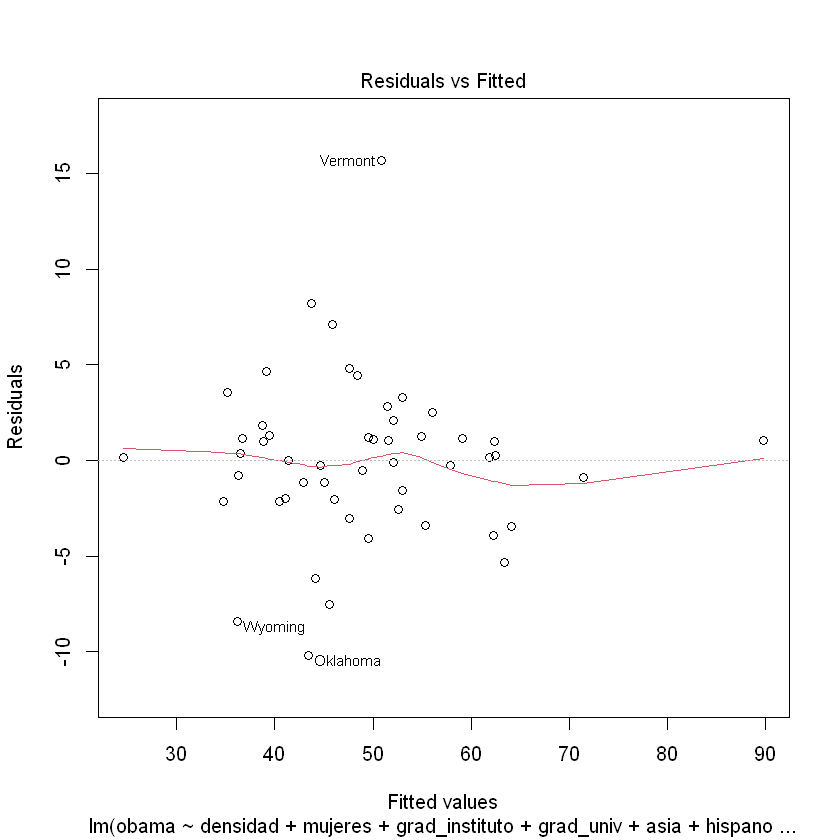

In [79]:
# 1. LINEALIDAD, Residuals vs Fitted
plot(mod10, 1)

La linealidad es clave para que las predicciones del modelo sean correctas. Para evaluar el supuesto utilizamos el gráfico de los residuos vs valores ajustados. Bajo linealidad, esperamos que no haya tendencia en los residuos. 
Para que exista linealidad, debe haber una nube de puntos donde se encuentra la linea de regresión entre ella, y no debe seguir estos puntos a la linea para que no haya tendencia. 

En nuestro caso vemos que no existe ninguna tendencia así que podemos afirmar que existe linealidad.

Si se incumple el supuesto de linealidad podríamos utilizar una transformación no lineal adecuada para los predictores problemáticos o añadir términos de interacción.

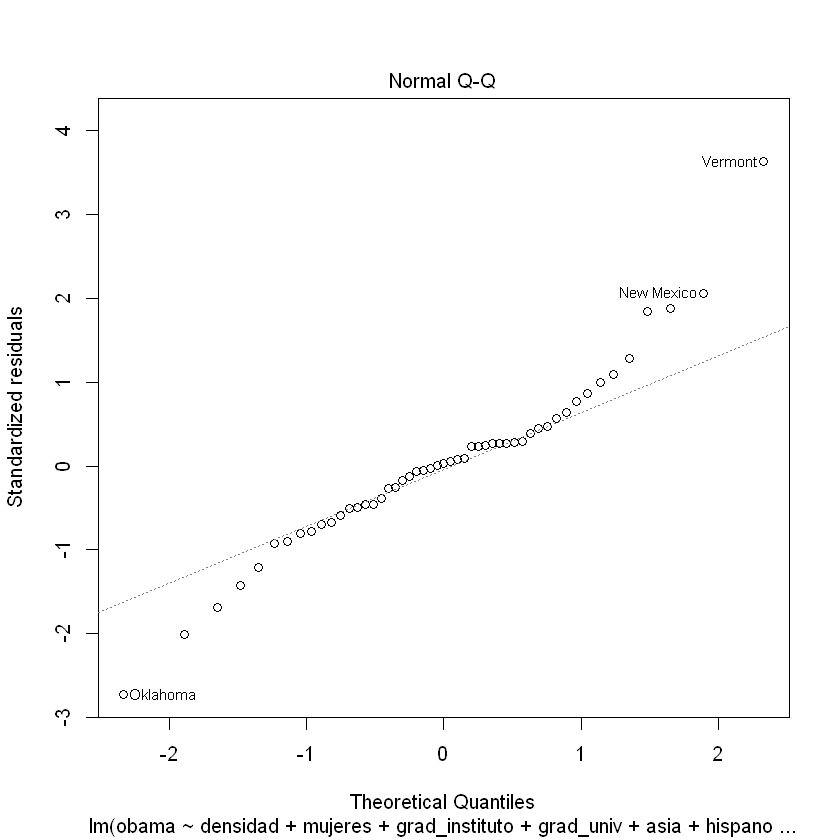

In [83]:
# 2.NORMALIDAD RESIDUOS, normal Q-Q
plot(mod10, 2)

Esta es la gráfica quantil-quantil sobre la normalidad de los residuos. Se asume que la desviación de los residuos (deviance residuals) sigue una distribución normal aproximada (asintóticamente). El cumplimiento de este supuesto dependerá de la distribución de la respuesta, pero también del tamaño de la muestra y de la distribución de los predictores.
Para comprobar si se cumple este supuesto observamos el gráfico QQ de los residuos estandarizados es habitual tener pequeñas desviaciones de la diagonal en los extremos, incluso en condiciones de normalidad, aunque estas desviaciones son más evidentes si los datos no son normales.

En nuestro caso vemos que existe ciertas desviaciones en los extremos y se puede apreciar leves ondulaciones, podemos estar en un caso de evidencia negativa.
Si se incumple el supuesto de distribución podemos necesitar ajustar modelos más flexibles (y más complejos)

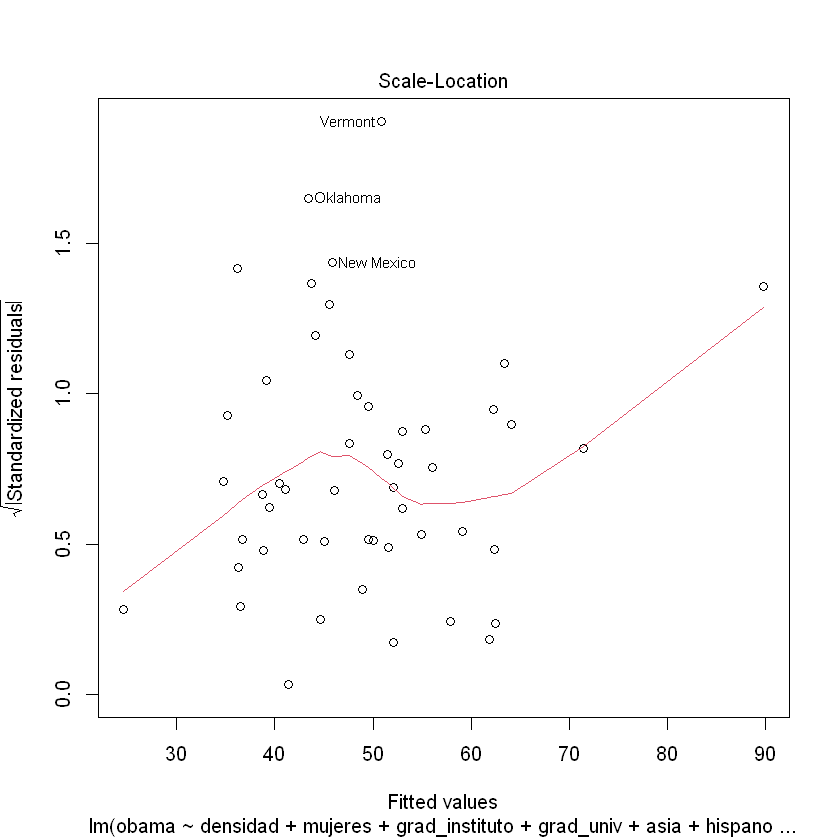

In [82]:
# 3.HOMOCEDASTICIDAD VARIANZA RESIDUOS,
plot(mod10, 3)

En el tercer gráfico se puede comprobar tambien la homocedasticidad de la varianza de los residuos. Para comprobarlo debemos observar que los puntos no vayan separándose más unos de otros a medida que vamos aumentando los valores. En este caso vemos que es constante la distancia entre los puntos, lo que quiere decir que estamos en un caso de homocedasticidad.

En caso contrario podríamos utilizar los residuos al cuadrado en valor absoluto en el eje Y, si de este modo sigue con problemas de heterocedasticidad entonces habría que modificar el modelo.


Warning message in sqrt(crit * p * (1 - hh)/hh):
"Se han producido NaNs"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"Se han producido NaNs"


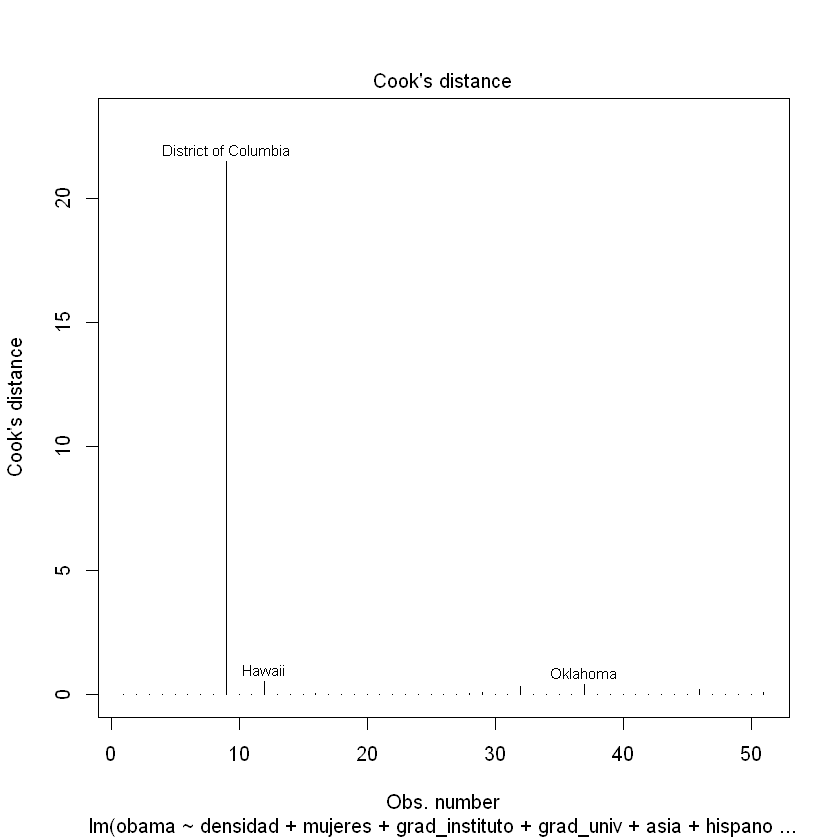

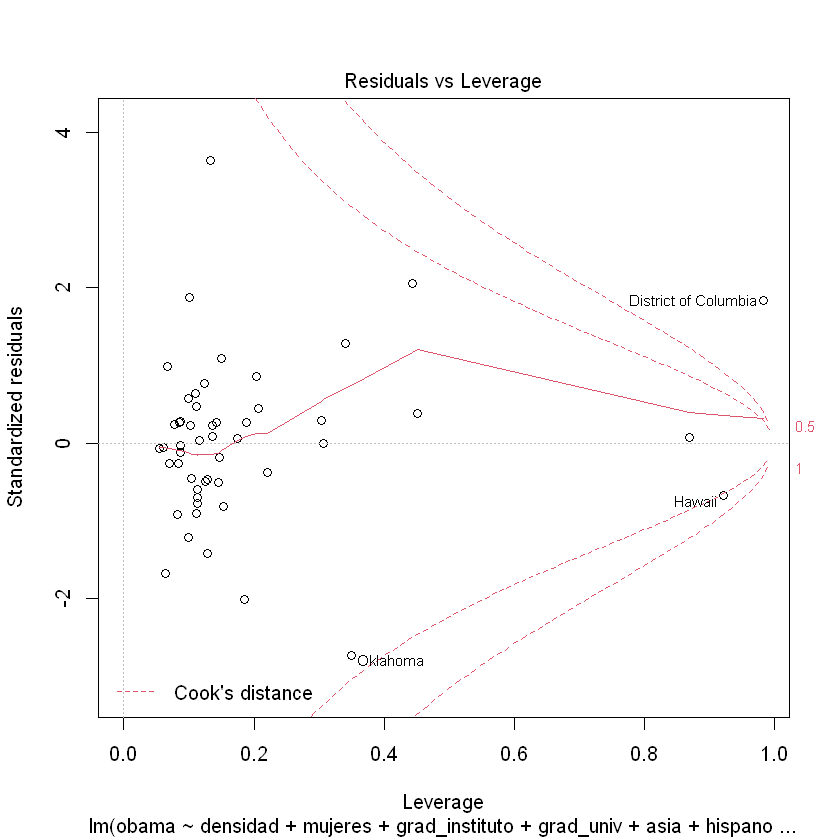

In [84]:
# 4. OBSERVACIONES ANÓMALAS, Cook distance
plot(mod10, 4:5)

En el primer gráfico vemos de forma directa las observaciones que se consideran puntos anómalos según la distancia de Cook. En nuestro caso vemos que el Distrito de Columbia es un punto anómalo muy influyente. 

En el siguiente gráfico podemos ver, además de los puntos anómalos, los puntos aberrantes (observación con un valor muy alto del residuo asociado, y los puntos con efecto palanca "leverage" (que no es predicha satisfactoriamente por el modelo).

Podemos considerar Hawaii y Oklahoma como puntos anómalos ya que están muy cerca de la distancia de Cook, pero habría que analizarlos más de cerca si interesa eliminarlos.

En cuanto puntos aberrantes no encontramos ninguno en el gráfico, ya que se situarían en valores muy negativos y a la derecha. Y puntos con alto efecto palanca tampoco, ya que estos se sitúan en valores muy positivos y a la derecha.

In [86]:
# 5. MULTICOLINEALIDAD
library(car)
vif(mod10)

densidad        mujeres grad_instituto      grad_univ           asia 
      2.216282       2.859693       5.064499       4.233634       1.137896 
      hispanos    evangelicos       mormones           paro 
      2.609682       2.231880       1.203564       1.650048

Por último, una forma útil de detectar la multicolinealidad es inspeccionar el VIF de cada coeficiente. VIF solo analiza las relaciones lineales de los predictores:
- VIF cercano a 1: ausencia de multicolinealidad.
- VIF mayor de 5 o 10: cantidad problemática de multicolinealidad . Se aconseja eliminar el predictor con mayor VIF.

Si tenemos problemas de multicolinealidad podemos eliminar la variable o realizar un análisis de componentes principales. 

En nuestro caso vemos que la variable grad_instituto tiene un valor igaul a 5, y además grad_univ es igual a 4. Esto es muy evidente a simple vista que estas dos variables estén creando un problema de multicolinealidad porque están muy correlacionas ya de forma natural. De todas formas valdría con eliminar la variable grad_instituto y comprobar de nuevo la eficacia del modelo.


También existe otro supuesto más que se debe considerar, que es el supuesto de INDEPENDENCIA. Asumimos que las observaciones que hemos tomado son independientes. Esto depende del diseño por el cual se han tomar los datos, si los datos tienen una componente temporal o espacial podrían contener problemas de autocorrelación.
Podemos analizar la autocorrelación de los residuos graficando los residuos en función de su índice de observación. 
Si las observaciones son independientes no deberíamos obtener ningún patrón.En caso de que se observen subidas o bajadas consecutivas en los residuos vs index, podríamos estar ante problemas de autocorrelación (temporal o espacial).

Si se incumple el supuesto de independencia poco se puede hacer si no hay independencia en las observaciones una vez recopilados. Si hay dependencia en serie (temporal), una diferenciación de la respuesta puede conducir a observaciones independientes. Si la dependencia es de otro tipo se deberá utilizar otro tipo de modelos, temporales o espaciales.

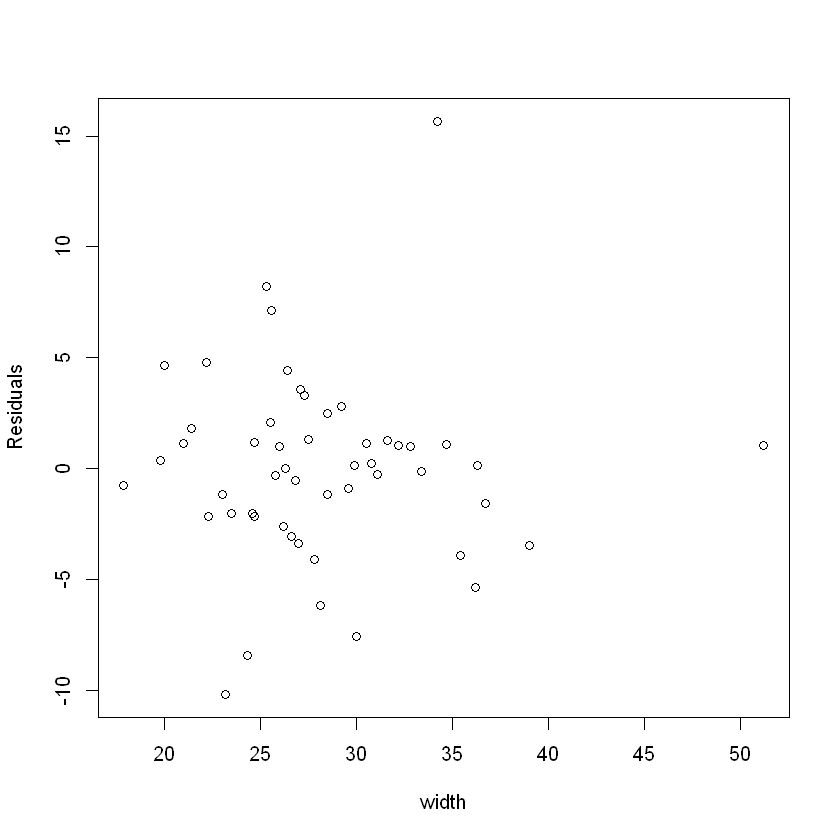

In [92]:
res = resid(mod10)
plot(usa$grad_univ, res, ylab="Residuals", xlab="width")

En el caso de la variable grad_univ vemos que no existe ningún tipo de patrón, por lo que no existe ningún tipo de dependencia. Habria que ver este gráfico para las demás variables.

# Bloque 2: Ejercicios intermedios de la prueba <a id="topic3"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


### 04 Ejercicio [1.5 puntos]

Utilizando el archivo de datos `hatco.RData` que contiene observaciones de clientes de la compañía de distribución industrial Hatco S.L. Realizar un modelo de regresión lineal múltiple de la variable `fidedila` que representa el porcentaje de compra de los clientes de la empresa Hatco S.L. en función de las siguientes variables explicativas: `velocida` que representa la velocidad de entrega, la variable `precio` que representa el nivel de precios, la variable `flexprec` que representa la flexibilidad de precios, la variable `imgfabri` que representa la imagen del fabricante, la variable `imgfvent` que representa la imagen de fuerza de ventas y la variable `calidadp` que representa la calidad del producto. Responder a las siguientes cuestiones:

1. Ajustar el mejor modelo de regresión lineal múltiple posible con ese conjunto de variables 
2. Comparar sus métricas y realizar la diagnosis del modelo de regresión lineal elegido
3. Realizar una interpretación de los coeficientes del modelo de regresión lineal elegido
4. Realizar la descomposición de valores ajustados y residuos del modelo de regresión lineal elegido
5. Evaluar e interpretar la bondad de ajuste del modelo de regresión lineal elegido ($R^2$ y $R^2_{adj}$)
6. Evaluar e interpretar la prueba de significatividad individual del modelo de regresión lineal elegido
7. Evaluar e interpretar la prueba de significatividad global del modelo de regresión lineal elegido
8. Evaluar e interpretar la multicolinealidad (existencia de relación lineal entre las variables independientes del modelo) usando la matriz de correlaciones

In [1]:
load("hatco.RData")

In [2]:
hatco

empresa,tamano,adquisic,tindustr,tsitcomp,velocida,precio,flexprec,imgfabri,servconj,imgfvent,calidadp,fidelida,satisfac,nfidelid,nsatisfa
<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,pequeña,descentralizada,clase A,nueva tarea,4.1,0.6,6.9,4.7,2.4,2.3,5.2,32,4.2,medio,bajo
2,grande,centralizada,otras industrias,nueva tarea,1.8,3.0,6.3,6.6,2.5,4.0,8.4,43,4.3,medio,bajo
3,grande,centralizada,clase A,recompra modificada,3.4,5.2,5.7,6.0,4.3,2.7,8.2,48,5.2,medio,alto
4,grande,centralizada,clase A,nueva tarea,2.7,1.0,7.1,5.9,1.8,2.3,7.8,32,3.9,medio,bajo
5,pequeña,descentralizada,clase A,recompra directa,6.0,0.9,9.6,7.8,3.4,4.6,4.5,58,6.8,alto,alto
6,grande,centralizada,clase A,recompra modificada,1.9,3.3,7.9,4.8,2.6,1.9,9.7,45,4.4,medio,bajo
7,pequeña,descentralizada,clase A,nueva tarea,4.6,2.4,9.5,6.6,3.5,4.5,7.6,46,5.8,medio,alto
8,grande,centralizada,otras industrias,recompra modificada,1.3,4.2,6.2,5.1,2.8,2.2,6.9,44,4.3,medio,bajo
9,pequeña,descentralizada,clase A,recompra directa,5.5,1.6,9.4,4.7,3.5,3.0,7.6,63,5.4,alto,alto


<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 04</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [3]:
hatco = hatco[,c("fidelida", "velocida", "precio", "flexprec", "imgfabri", "imgfvent", "calidadp")]

In [4]:
model1 <- lm(fidelida ~ 1, data = hatco)
model2 <- lm(fidelida ~ ., data = hatco)
step(model1, direction = "forward", scope = list(upper=model2, lower=model1))

Start:  AIC=434.65
fidelida ~ 1

           Df Sum of Sq    RSS    AIC
+ velocida  1    3558.5 4268.2 376.62
+ flexprec  1    2615.5 5211.3 396.38
+ imgfvent  1     556.9 7269.9 429.34
+ imgfabri  1     394.2 7432.5 431.53
+ calidadp  1     325.8 7501.0 432.44
<none>                  7826.8 434.65
+ precio    1      46.2 7780.6 436.06

Step:  AIC=376.62
fidelida ~ velocida

           Df Sum of Sq    RSS    AIC
+ precio    1    892.61 3375.6 355.39
+ flexprec  1    557.97 3710.3 364.75
+ imgfvent  1    354.86 3913.4 370.03
+ imgfabri  1    287.66 3980.6 371.71
+ calidadp  1    164.23 4104.0 374.74
<none>                  4268.2 376.62

Step:  AIC=355.39
fidelida ~ velocida + precio

           Df Sum of Sq    RSS    AIC
+ flexprec  1   1419.79 1955.8 303.36
+ imgfvent  1    148.99 3226.6 352.92
<none>                  3375.6 355.39
+ imgfabri  1     65.93 3309.7 355.44
+ calidadp  1      4.68 3370.9 357.25

Step:  AIC=303.36
fidelida ~ velocida + precio + flexprec

           Df Sum of


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = hatco)

Coefficients:
(Intercept)     velocida       precio     flexprec     imgfvent  
     -8.007        3.808        3.805        3.469        1.676  


In [104]:
step(model2)

Start:  AIC=299.64
fidelida ~ velocida + precio + flexprec + imgfabri + imgfvent + 
    calidadp

           Df Sum of Sq    RSS    AIC
- imgfabri  1      0.46 1773.3 297.66
- calidadp  1     27.38 1800.2 299.15
<none>                  1772.8 299.64
- imgfvent  1     44.18 1817.0 300.07
- precio    1   1227.44 3000.3 349.72
- flexprec  1   1449.20 3222.0 356.78
- velocida  1   1670.53 3443.4 363.36

Step:  AIC=297.66
fidelida ~ velocida + precio + flexprec + imgfvent + calidadp

           Df Sum of Sq    RSS    AIC
- calidadp  1     27.52 1800.8 297.19
<none>                  1773.3 297.66
- imgfvent  1    126.49 1899.8 302.48
- precio    1   1267.03 3040.3 349.04
- flexprec  1   1453.32 3226.6 354.92
- velocida  1   1687.80 3461.1 361.87

Step:  AIC=297.19
fidelida ~ velocida + precio + flexprec + imgfvent

           Df Sum of Sq    RSS    AIC
<none>                  1800.8 297.19
- imgfvent  1    155.01 1955.8 303.36
- flexprec  1   1425.81 3226.6 352.92
- precio    1   1462.22 326


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = hatco)

Coefficients:
(Intercept)     velocida       precio     flexprec     imgfvent  
     -8.007        3.808        3.805        3.469        1.676  


En ambos casos obtenemos el mismo modelo. Nuestro modelo final tendrá como predictores las variables velocidad, precio, flexprec y imgfvent.

In [5]:
model0 <- lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, data = hatco)
summary(model0)


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = hatco)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1378  -2.3612  -0.0458   3.0770   7.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.0066     3.6860  -2.172  0.03236 *  
velocida      3.8082     0.3989   9.546 1.70e-15 ***
precio        3.8046     0.4355   8.736 8.91e-14 ***
flexprec      3.4686     0.4021   8.627 1.52e-13 ***
imgfvent      1.6764     0.5894   2.845  0.00546 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.377 on 94 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7699,	Adjusted R-squared:  0.7601 
F-statistic: 78.64 on 4 and 94 DF,  p-value: < 2.2e-16


<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [108]:
R2=c(summary(model2)$r.squared, summary(model0)$r.squared)
AIC=c(extractAIC(model2)[2],extractAIC(model0)[2])
BIC=c(extractAIC(model2,k=log(nrow(hatco)))[2],extractAIC(model0,k=log(nrow(hatco)))[2])

In [110]:
Medidas=data.frame(R2,AIC,BIC,row.names=c("model2","model0"))
names(Medidas)=c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas)



|       | Coef.R2adj|      AIC|      BIC|
|:------|----------:|--------:|--------:|
|model2 |  0.7734919| 299.6357| 317.8718|
|model0 |  0.7699162| 297.1863| 310.2122|

En todos los casos se obtiene mejores métricas en el modelo seleccionado.

Una vez formulado el modelo debemos contrastar que el modelo seleccionado es bueno. Para ello debe cumplir ciertos requisitos, o al menos la mayoría de ellos, tales como: 

- Variables linealmente relacionas

- Normalidad de los residuos

- Homocedasticidad en los residuos

- Observaciones anómalas

- No existencia de multicolinealidad

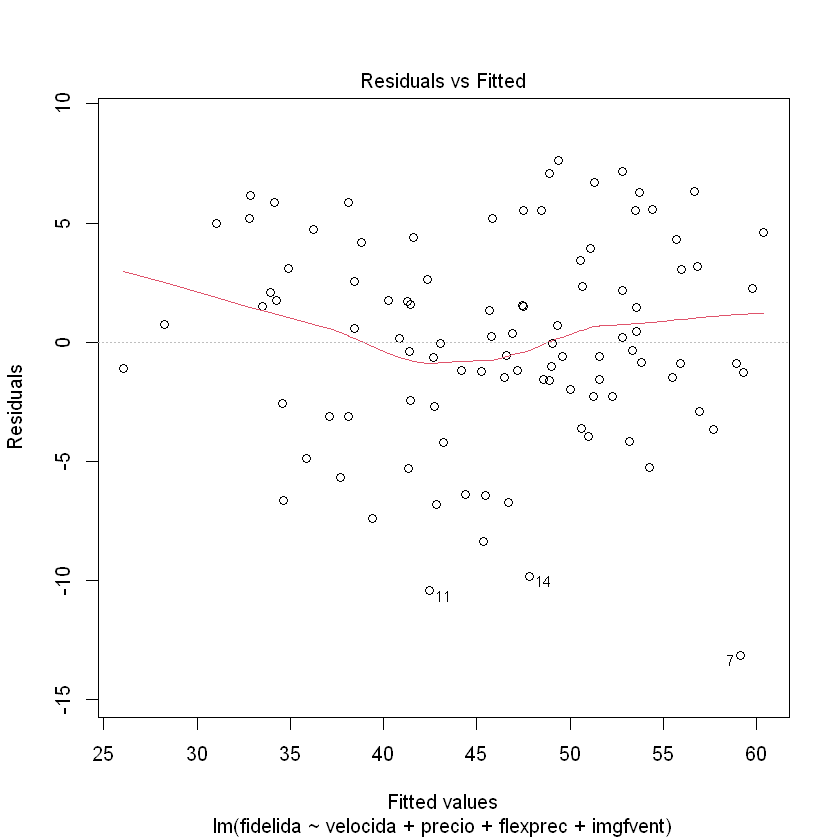

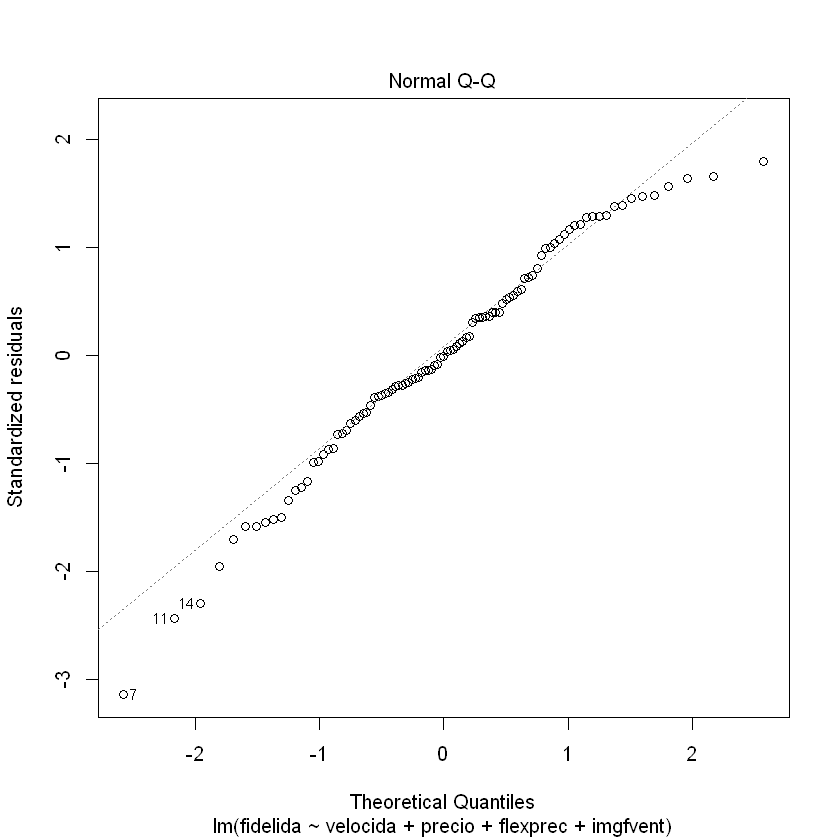

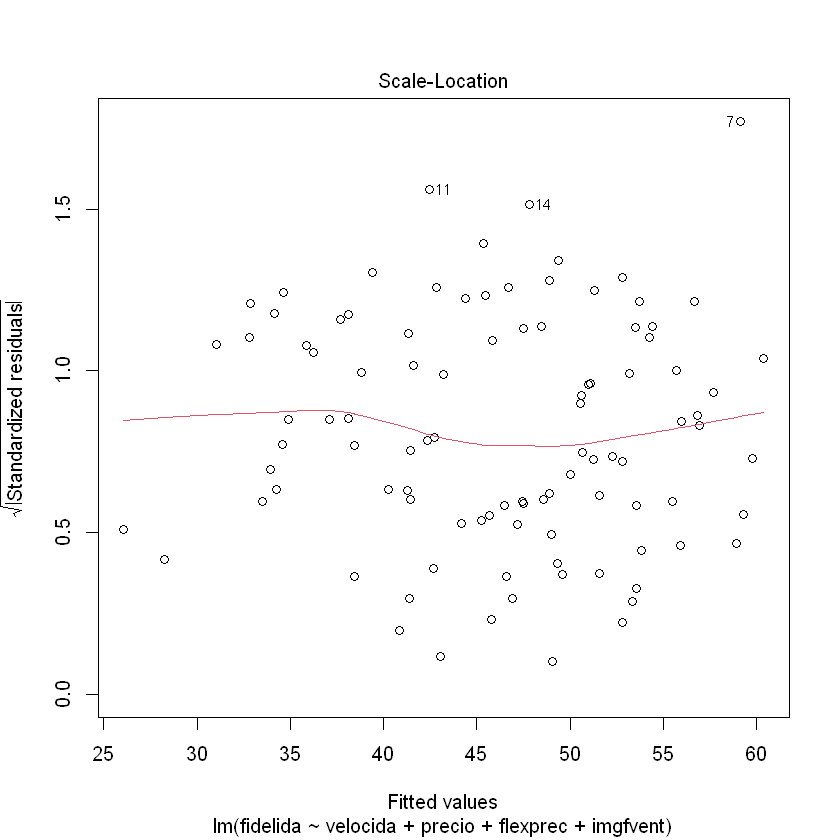

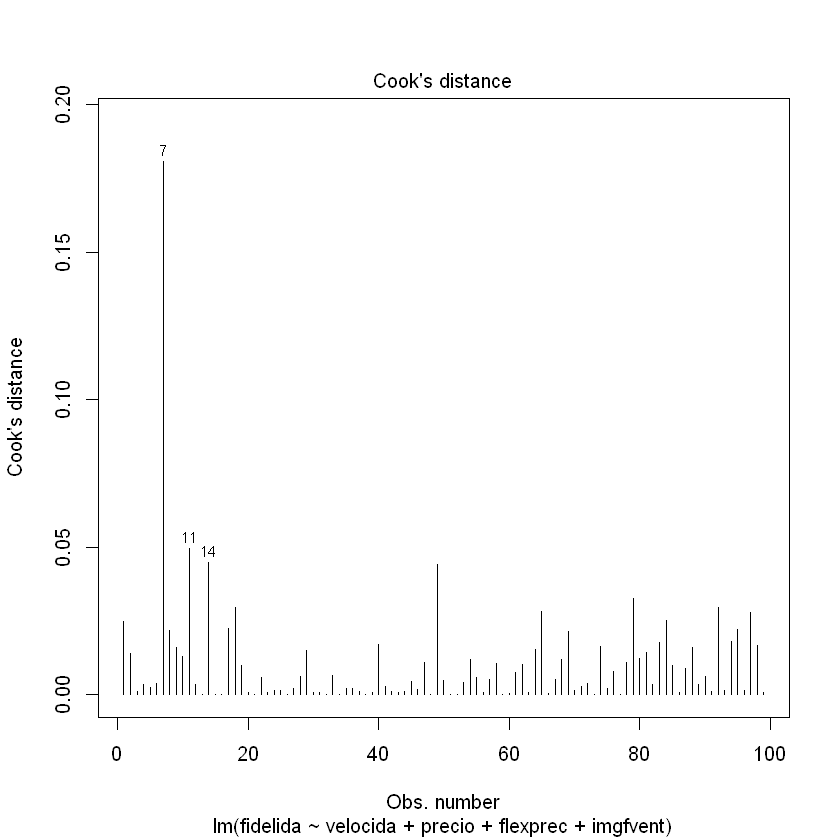

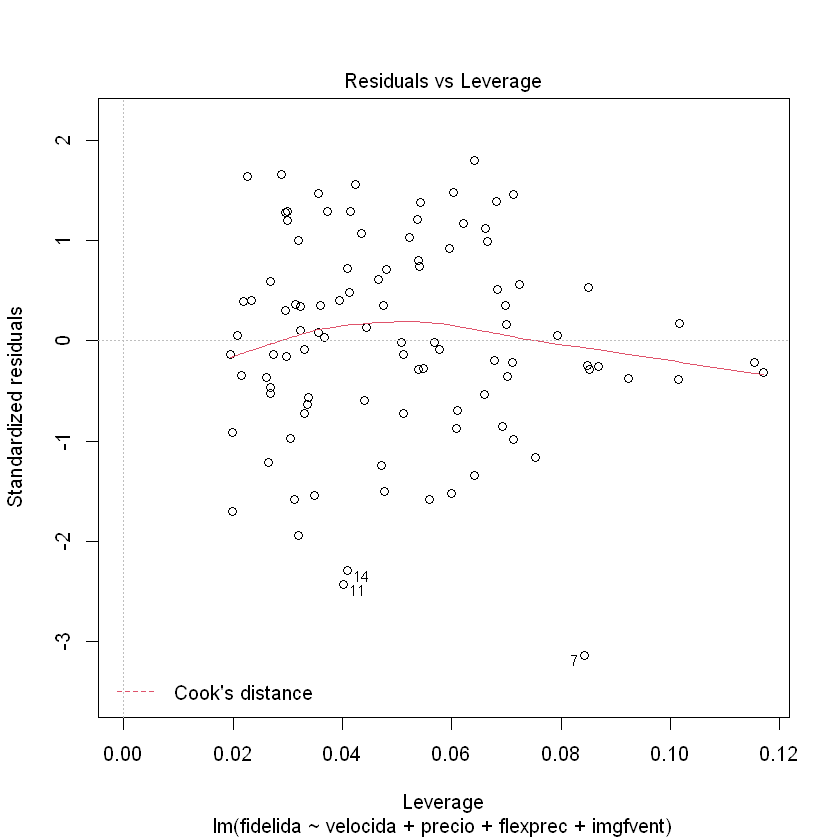

In [112]:
plot(model0, 1:5)

En el primer gráfico vemos que las variables están linealmente relacionadas ya que no siguen a la linea de regresión y forman una nube de puntos dispersa.

En el segundo gráfico vemos una leve ondulación durante la recta, así como una desviación en los extremos.

En el tercero se puede observar como existe homocedasticidad en la varianza de los residuos.

En el cuarto y quinto vemos que hay tres valores anómalos, con valor inferior a -2, siendo la observación 7 la más alejada del resto. Habría que considerar si es apropiado eliminar estas observaciones o evaluar el modelo con y sin estas.

In [113]:
vif(model0)

velocida   precio flexprec imgfvent 
1.426035 1.397852 1.595493 1.064529

Vemos que no hay problemas de multicolinealidad

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [7]:
# extrcción de los coeficientes de regresión
coef(model0)

(Intercept)    velocida      precio    flexprec    imgfvent 
  -8.006609    3.808208    3.804574    3.468602    1.676431

Obtenemos un intercepto con un valor negativo, lo que significa que cuando todas las variables explicativas son 0 la fidelidad es negativa, no es coherente pero se entiende que si no hay incentivos al cliente este no se fidelizará. Vemos por otro lado que el resto de variables tienen coeficientes positivos, es decir que a medida que estos aumentan también aumenta la fidelidad. Esto tampoco es muy coherente en la variable precio, pero en el resto de variables sí. 

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [8]:
# Extracción de los valores ajustados de la variable dependiente
head(model0$fitted.values)

1        2        3        4        5        6 
37.67893 38.81980 49.02248 34.56299 59.27692 42.37126

In [9]:
# Extracción de los residuos
head(model0$residuals)

1         2         3         4         5         6 
-5.678934  4.180196 -1.022477 -2.562993 -1.276918  2.628744

In [10]:
# Comprobamos y = y_estimado + residuos_estimados (1º observación)
37.68 - 5.68 

[1] 32

In [13]:
hatco$fidelida[1]

[1] 32

Comprobamos que el calculo está bien realizado. Ya que el valor ajustado más el residuo debe ser igual al valor observado.

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

In [15]:
output = summary(model0)

In [17]:
output$r.squared
output$adj.r.squared

[1] 0.7699162

[1] 0.7601254

El R2 determina la variabilidad explicada por las variables independientes. En este caso tenemos un 0.769, lo que quiere decir que las variables seleccionadas son capaces de explicar el 76.9% de la variabilidad de la variable dependiente. Este porcentaje es relativamente alto, pero aún queda más variables capaces de explicar el resto de variabilidad del modelo.
Ademas vamos que apenas existe penalización de haber introducido este número de variables.

<div style="background-color:#5DADE2"><b>Apartado 6</b></div>

In [18]:
output


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = hatco)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1378  -2.3612  -0.0458   3.0770   7.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.0066     3.6860  -2.172  0.03236 *  
velocida      3.8082     0.3989   9.546 1.70e-15 ***
precio        3.8046     0.4355   8.736 8.91e-14 ***
flexprec      3.4686     0.4021   8.627 1.52e-13 ***
imgfvent      1.6764     0.5894   2.845  0.00546 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.377 on 94 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7699,	Adjusted R-squared:  0.7601 
F-statistic: 78.64 on 4 and 94 DF,  p-value: < 2.2e-16


Para evaluar la significatividad individual del modelo nos debemos fijar en el apartado de los coeficientes. Aquí vemos: 

- El valor de los coeficientes.
- El error estándar de los coeficientes. En este caso, el error estándar de 3.68 en el intercepto indica que hay cierta variabilidad en la estimación de la fidelidad, independientemente del resto de variables. Un valor alto del error estándar sugiere una menor precisión en la estimación de este coeficiente. Por otro lado, el error estándar del resto de variables es mucho más bajo (entre 0.39 y 0.58), sugiere que hay más precisión en la estimación del efecto de estas variables.
- El t-valor, que es el cociente de la estimación entre el error estándar y se utiliza para los contrastes de significatividad de los coeficientes.
- El p-valor del contraste de significatividad, donde H0 -> coeficiente = 0, e hipótesis alternativa, H1 -< coefficiente != 0. En este ejemplo, todas las variables incluido el intercepto, el P-valor es menor a 0.05, por lo que se rechaza la hipótesis nula, confirmando así que los coeficientes de las variables y el intercepto son estadísitcamente significativos.

<div style="background-color:#5DADE2"><b>Apartado 7</b></div>

In [19]:
output


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = hatco)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1378  -2.3612  -0.0458   3.0770   7.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.0066     3.6860  -2.172  0.03236 *  
velocida      3.8082     0.3989   9.546 1.70e-15 ***
precio        3.8046     0.4355   8.736 8.91e-14 ***
flexprec      3.4686     0.4021   8.627 1.52e-13 ***
imgfvent      1.6764     0.5894   2.845  0.00546 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.377 on 94 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7699,	Adjusted R-squared:  0.7601 
F-statistic: 78.64 on 4 and 94 DF,  p-value: < 2.2e-16


Para comprobar la significatividad global del modelo nos debemos fijar en el último apartado. En primer lugar nos muestra el error estándar del residuo, que es de 4.37, esto nos dice que el modelo de regresión predice la fidelidad de los clientes con un error promedio de aproximadamente 4.377. Por tanto cuanto menor sea este valor mejor. 

Aquí tambien nos muestra que hay una observación con algún valor faltante, y que directamente lo ha eliminado del modelo. Esto es bueno ya que no debemos considerar esta observación, a menos que le demos un valor coherente a este valor faltante para no perder información con el resto que nos aporta.

Por otro lado tenemos el valor del R2, el cuadrado del coeficiente de correlación r. Un R2 más grande significa que el modelo es mejor. También se puede interpretar como la proporción de variación en la variable dependiente explicada por el modelo. En nuestro caso es de 76.9%, y el ajustado, que penaliza el incremento de variables, es de 76.01%.

Por útimo tenemos que estadístico F. que pretende determinar si de entre un grupo de variables independientes, al menos una tiene capacidad de explicar una parte significativa de la variación de la variable dependiente. el p-valor del contraste es menor a 0.05 por lo que se rechaza la hipótesis nula, confirmando así que al menos una de las variables explica una parte significativa del modelo.

<div style="background-color:#5DADE2"><b>Apartado 8</b></div>

In [23]:
hatco2 <- hatco[, c("fidelida", "velocida", "precio", "flexprec", "imgfvent")]
head(hatco2)

,fidelida,velocida,precio,flexprec,imgfvent
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,32,4.1,0.6,6.9,2.3
2,43,1.8,3.0,6.3,4.0
3,48,3.4,5.2,5.7,2.7
4,32,2.7,1.0,7.1,2.3
5,58,6.0,0.9,9.6,4.6
6,45,1.9,3.3,7.9,1.9


In [30]:
nrow(na.omit(hatco2))
nrow(hatco2)

[1] 99

[1] 100

In [31]:
hatco2 = na.omit(hatco2)

In [32]:
cor(hatco2)

,fidelida,velocida,precio,flexprec,imgfvent
fidelida,1.00000000,0.67428681,0.07682487,0.57807750,0.26674626
velocida,0.67428681,1.00000000,-0.35439461,0.51879732,0.08084452
precio,0.07682487,-0.35439461,1.00000000,-0.48550163,0.18873090
flexprec,0.57807750,0.51879732,-0.48550163,1.00000000,-0.03801323
imgfvent,0.26674626,0.08084452,0.18873090,-0.03801323,1.00000000


Vemos que la mayor correlación existente entre las variables independientes es de 0.5187. Este valor no es muy alto como para que exista un problema de colinealidad.

### 05 Ejercicio [1.5 puntos] 

En este ejercicio deberéis de <u>crear vuestra propia función de R</u> con el objetivo de automatizar el proceso de ajuste de un modelo de regresión lineal múltiple a un conjunto de datos de sección cruzada dado. Es decir, tenéis que replicar la función `lm` de la librería $\tt stats$. Una vez creada, comparar los resultados obtenidos con la propia función `lm` utilizando alguna de las bases de datos propias de las librerías de R teniendo en cuenta los principales objetos de la salida de los modelos: output de la regresión, coeficientes de regresión estimados, residuos estimados, grados de libertad, etc.

Para aplicar a un ejemplo la función que diseñéis podéis utilizar cualquier base de datos disponible en las precargadas de R.

In [13]:
data(package = .packages(all.available = TRUE))

Package,Item,Title
<chr>,<chr>,<chr>
datasets,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
datasets,BJsales,Sales Data with Leading Indicator
datasets,BJsales.lead (BJsales),Sales Data with Leading Indicator
datasets,BOD,Biochemical Oxygen Demand
datasets,CO2,Carbon Dioxide Uptake in Grass Plants
datasets,ChickWeight,Weight versus age of chicks on different diets
datasets,DNase,Elisa assay of DNase
datasets,EuStockMarkets,"Daily Closing Prices of Major European Stock Indices, 1991-1998"
datasets,Formaldehyde,Determination of Formaldehyde


<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 05</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

Para utilizar esta función se debe posicionar la variable dependiente como la primera columna del modelo, y dejar el resto de variables deseadas como independientes

In [14]:
library(wooldridge)
data(wage1)

In [78]:
wage2 = wage1[, c("wage", "educ", "exper", "tenure")]


In [139]:
funcion_ml <- function(data) {
    
    y <- data[, 1]
    X <- as.matrix(cbind(cte = 1, data[, -1])) 
    betas <- solve(t(X) %*% X) %*% t(X) %*% y
    yajustado <- X%*%betas
    residuos <- y-yajustado
    gdl = nrow(data)- length(betas)
    resi2 = (residuos)^2
    sigma = sqrt(sum(resi2)/gdl)
    varcov2 = sigma^2 * solve(t(X) %*% X)
    se2 = sqrt(diag(varcov2))
    R2 = var(yajustado)/var(y)
    output = summary(lm(y~X, data))

    
    cat("coeffiecientes:", betas, '\n')
    cat("yajustado (cabeza):", head(yajustado), '\n')
    cat("residuos (cabeza):", head(residuos), '\n')
    cat("grados de libertad:", gdl, '\n')
    cat("suma de los cuadrados de los residuos:", sigma, '\n')
    cat("error estándar de los parámetros estimados:",rbind(names(se2), se2), '\n')
    cat("coeficiente de determinación R2:", R2, '\n')
}

In [140]:
funcion_ml(wage2)

coeffiecientes: -2.872735 0.5989651 0.02233952 0.1692687 
yajustado (cabeza): 3.76056 5.144853 3.76056 7.641447 4.80976 8.265911 
residuos (cabeza): -0.66056 -1.904853 -0.7605599 -1.641447 0.4902403 0.4840889 
grados de libertad: 522 
suma de los cuadrados de los residuos: 3.084476 
error estándar de los parámetros estimados: cte 0.728964293723718 educ 0.0512835488930161 exper 0.0120568479745608 tenure 0.0216446071267151 
coeficiente de determinación R2: 0.3064224 


# Bloque 3: Ejercicio avanzado de la prueba <a id="topic4"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


### 06 Ejercicio [2 puntos]

En este ejercicio deberéis de realizar paso a paso las diferentes etapas que aparecen en el R Notebook `Script 4.3 Estimación de los modelos de regresión espacial`. Es decir, tenéis que realizar los siguientes apartados. 

1. Cargar las librerías necesarias.
2. Cargar las cartografías de los municipios españoles del Notebook '$4.2$ Estimación modelos de regresión datos espaciales' (`Munic04_ESP`).
3. Realizar los mapas descriptivos oportunos.
4. Contruir la matriz de pesos espaciales (al menos, por estos dos criterios).
- Por contigüidad de la reina
- Por k-vecinos cercanos

5. Contruir los retardos espaciales.
6. Realizar el proceso de correlación entre una variable y su retardo espacial.
- Coeficiente de correlación espacial global
- Coeficiente de correlación espacial local 

7. Estimar el modelo de regresión lineal SIN tener en cuenta el efecto espacial. 
8. Estimar dos modelos de regresión CON dependencia espacial: Spatial Lag Model (SLM) y Spatial Error Model (SEM). 

**Nota.** El dataset `Munic04_ESP` lo podéis encontrar en la carpeta del tema $4$ y, como sabéis, contiene información sobre diferentes variables socioeconómicas que tenéis que considerar para poder realizar dichos pasos y validar los resultados. La variable dependiente es la tasa de paro `TASA_PARO`, las independientes son el resto de variables numéricas. Ustedes elegís cuántas consideráis teniendo siempre en cuenta que debe de existir una correlación entre las variables explicativas y la explicada para poder aplicar los modelos de regresión.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 06</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

<div style="background-color:#5DADE2"><b>Apartado 6</b></div>

<div style="background-color:#5DADE2"><b>Apartado 7</b></div>

<div style="background-color:#5DADE2"><b>Apartado 8</b></div>

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>